# LIBRERIE PRINCIPALI
Si tratta di librerie/moduli/file esterni che possiamo implementare nel nostro programma. Un esempio banale é un programma scritto da noi con delle funzioni definite e che noi andiamo a richiamare in un altro programma (in questo caso tale file esterno sarà in formato '.py'). Altri esempi sono librerie note come Numpy, Matplotlib, Pandas ecc

Note: See [here](https://wiki.python.org/moin/TimeComplexity) for the complexity of operations on standard Python data structures.

In [2]:
# elenco completo delle librerie usate:
import numpy as np
from numpy import random as npr 
import pandas as pd
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import basinhopping
from scipy import stats
from scipy.integrate import quad

# NUMPY
É una libreria che introduce gli array e il cacolo tra di essi velocizzato, fondamentale in matematica. We import it using `import numpy as np`. It contains, among other things:

  * a powerful N-dimensional array object
  * sophisticated operations on arrays
  * tools for integrating C/C++ and Fortran code (not covered in the course)
  * (pseudo-)random number generation (today? if not in the next lectures)
  * linear algebra, Fourier transform, ... (in the next lectures)

Numpy features a very detailed [documentation](https://numpy.org/doc/stable/user/whatisnumpy.html), with clear examples too.

NOTA: In NumPy, l'asse (axis) è un concetto che si riferisce alla direzione lungo cui viene eseguita un'operazione su un array multidimensionale.
Spiegazione degli assi:

* axis=0: Quando usi axis=0, l'operazione viene eseguita lungo le colonne. Ad esempio, se sommi lungo axis=0, si sommano gli elementi per ogni colonna. (pensala così: l'asse 0 delle righe è fissato, quindi ti muovi lungo le colonne)
* axis=1: Quando usi axis=1, l'operazione viene eseguita lungo le righe.

### COMANDI PRINCIPALI
* `np.array(oggetto)`: trasforma un oggetto (lista, tupla...) in un array di numpy
* `np.arange(start, stop, step)`: crea array con sequenza di numeri distanziati dalla quantità step
* `np.linspace(start, stop, tot)`: serve a generare un array di tot numeri equidistanti su un intervallo specificato
* `np.zeros(shape)`: crea un array di dimensioni specificate (vuole una tupla in input), riempiendolo di 0.
* `np.ones(shape)`: crea un array di dimensioni specificate (vuole una tupla in input), riempiendolo di 1.
* `np.identity(dim)`: crea una matrice identità di dimensioni (dim)x(dim). Similmente fa *np.eye(dim)*
* `np.diag(input)`: se l'input è un array 1D, crea una matrice sulla cui diagonale ci sono gli elementi dell'array; se l'input è una matrice, crea un array 1D con dentro gli elementi che erano sulla diagonale
* `nome_array.shape()`: restituisce la lunghezza di ogni dimensione (in una tupla)
* `nome_array.ndim()`: restituisce il numero delle dimensioni dell'array (1D, 2D, 3D, ecc)
* `np.fromfunction(function, shape)`: crea un array applicando una funzione specificata a ciascuna posizione (indice) del nuovo array
* `np.digitize(x, bins)`: assegna ogni elemento dell'array x a un intervallo specifico basato su una serie di bin definiti dall'utente. Restituisce un array di interi in cui ogni elemento rappresenta l'indice del bin (intervallo) in cui il valore corrispondente in x è stato collocato.


NOTA: ora per sapere con che oggetti si ha a che fare si hanno a disposizione 2 funzioni. Il solito `type()` mi dice con che oggetto ho a che fare (stringa, array numpy...), il nuovo `dtype` mi dice di che tipo sono gli oggetti dentro il mio array (bool, float, complex, stringhe...).

Per ritrasformare un array numpy in una lista python serve il metodo `nome_array.tolist()`, poichè usando il solito *list(nome_array)* in caso di più dimensioni restituisce una lista di array numpy invece che una lista di liste.

In [1]:
import numpy as np

In [4]:
# creazione array
arr = np.array([1,2,3,4,5])            # prende la lista di input e la trasforma in numpy array
a = np.array([1, 2, 3], dtype='float64')     # per specificare il tipo
print(a.dtype)

arr0 = np.array(42)                    # definizione di uno scalare (array di zero dimensioni)
arr0_5 = np.array([42])                # definizione di un array di una dimensione con un solo elemento dentro (sembra strano ma le vede come cose diverse)
print(arr0.shape)
print(arr0_5.shape)

# creiamo array di piú dimensioni (matrici)
arr1 = np.array([1,2,3,4,5])           # array di 1 dimensione (vettore)
arr2 = np.array([  [1,2,3,4,5], 
                   [6,7,8,9,10]  ])    # array 2D (matrice)
arr3 = np.array([      [[1,2] , [3,4] ] ,      [[5,6] , [7,8] ]            ])              # array 3D (tensore)
arr5 = np.array([1,2,3], ndmin=5)      # creazione automatica di array 5D (occhio che é 'ndmin' non 'ndim')
# per creare in modo automatizzato degli array si puó usare:
arr_a = np.arange(2, 50, 5)            # array dei numeri da 2 a 50 (escluso) a passi di 5
arr_b = np.zeros( (3,2) )              # array 3x2 di zeri
arr_c = np.ones( (3,4,2) )             # array 3x4x2 con tutti valori 1

# definition from list comprehensions
array = np.array([(i, j) for i in range(2) for j in range(3)])
print(array, '\n')

# definition from a function
fromfunct = np.fromfunction(lambda i, j: (i - 2)**2 + (j - i)**2, (5, 5))
print(fromfunct, '\n')

# np.digitize:
x = [1, 2.1, 3.5, 4.6, 5]
bins = [2, 4, 6]          # creo 4 bins ( da -inf a 2, da 2 a 4, da 4 a 6, da 6 a +inf)
print( np.digitize(x, bins) ) # Output: [0, 1, 1, 2, 2]

float64
()
(1,)
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]] 

[[ 4.  5.  8. 13. 20.]
 [ 2.  1.  2.  5. 10.]
 [ 4.  1.  0.  1.  4.]
 [10.  5.  2.  1.  2.]
 [20. 13.  8.  5.  4.]] 

[0 1 1 2 2]


Un comando molto utile per caricare dati da file esterni txt, csv ecc è: 

`np.loadtxt(file_name, dtype=float, comments='#', delimiter, skiprows, usecols)`: carica dati da un file di testo in un array NumPy. Con comments indico quali righe saltare (poichè da leggere come commenti), con delimiter il separatore tra le cifre, con skiprows quante righe iniziali saltare, con usecols specifico quali colonne deve leggere. Esempio:
```python
# Carica dati da un file CSV con valori separati da virgole
data = np.loadtxt("data.csv", delimiter=",")
# Carica solo le prime due colonne, saltando la prima riga e considerando le righe che iniziano con '#' come commenti
data = np.loadtxt("data.txt", skiprows=1, usecols=(0, 1), comments="#")
years, money = data.T # trick: columns to variables
```

DA AGGIUNGERE: `np.savetxt`, 

`np.load`:
np.load

np.load carica file binari salvati nel formato .npy o .npz, che sono specifici di NumPy e utilizzati per archiviare array in modo efficiente.
Caratteristiche principali

    Supporta solo file binari in formato .npy o .npz.
    Permette di caricare array NumPy (o gruppi di array, se il file è .npz).
    Mantiene il tipo di dato e la struttura originale dell'array.
    Molto veloce per dati di grandi dimensioni.

Sintassi

numpy.load(file, mmap_mode=None, allow_pickle=False, fix_imports=True, encoding='ASCII')

    file: Nome del file .npy o .npz.
    allow_pickle: Se impostato a True, consente di caricare oggetti serializzati con pickle (ad esempio, array di oggetti complessi).
    mmap_mode: Se specificato ('r', 'r+', ecc.), carica il file in modalità memory-mapped per grandi dataset.

Esempio
```python
# Salva un array in formato .npy
arr = np.array([[1, 2, 3], [4, 5, 6]])
np.save('data.npy', arr)

# Carica il file .npy
loaded_arr = np.load('data.npy')
print(loaded_arr)
```

Comandi utili per un array numpy: 
* `nome_array.reshape(new_shape)`: restituisce un array (come view!!) con forma *new_shape* rimodellando quello precedente
* `nome_array.flatten()`: restituisce una (deep) copy dell'array originale trasformandolo in un array 1D, indipendentemente dalla sua forma iniziale
* `nome_array.copy()`: restituisce una (deep) copy dell'array originale
* `np.concatenate(arr1, arr2, ...)`: concatena gli array in un unico lungo array (o comunque nella stessa dimensione)
* `np.stack(arr1, arr2, ...)`: unisce gli array in un nuovo array di array (ovvero creando una nuova dimensione)

Nota: with numpy objects, the `id()` function (to know if two objects are the same object) does not always work. To check whether two variables point to the same PyObject, use `np.may_share_memory(a, b)`.

In [5]:
arr_d = arr0.copy()                 # per creare la copia di un array

# per scorrere gli elementi:
for x in np.nditer(arr2):    # con 'nditer' scorro automaticamente i singoli elementi
    print(x)

# per stampare gli indici degli array si usa 'ndenumerate' e un indice in piú nel 'for':
for idx, x in np.ndenumerate(arr2):
    print(idx, x)
    
# per UNIRE due array (che abbiano la stessa dimensione):
arr_a = np.array([1,2,3])
arr_b = np.array([4,5,6])
arr_c = np.concatenate((arr_a, arr_b))            # cosi li unisco sulla stessa dimensione (che é la primna essendo sottinteso axis=0)
#arr_d = np.concatenate((arr_a, arr_b), axis=1 )  # cosi li unisco sulla seconda dimensione (solo se c'é una seconda dimensione ovviamente)
arr_c = np.stack((arr_a, arr_b))                  # cosi li unisco in una nuova dimensione, cioe il nuovo array avrá una dimensione in piu

# con hstack, vstack, dstack specifico io su quale dimensione volgio unire (horizontal=0, vertical=1, depth=2)
# con 'split' si puó anche spezzare in piú parti un array

# per CERCARE un elemento su un array si usa 'where':
arr_ricerca = np.where(arr_a == 3)        # cerco l'elemento '3' in 'arr_a' e mi restituisce l'indice a cui lo trovo
arr_ricerca_1 = np.where(arr_a %2 == 0)     # cerco tutti gli elementi pari (cioé a resto nullo)

# 'np.where' si usa anche per eguagliare tramite condizione. La sintassi é:
#                 'np.where(condition, x, y)' che restituisce un array composto da elementi presi da x dove la condition è vera, e da y dove la condition è falsa
#La funzione 'np.argwhere' restituisce gli indici degli elementi che soddisfano una condizione specificata, tipo 'nome_indici = np.argwhere( condizione )'
     # ma occhio che restituisce un array fatto di array unidimensionali con dentro gli indici, cioé insomma resistuisce qualcosa di bidimensionale
# 'np.max(nome_array)' restituisce il valore massimo tra quelli di un array

# per ORDINARE gli elementi di un array si usa 'sort':
arr_ordinato = np.sort(arr_a)

# per filtrare velocemente:
filtro = arr % 2 == 0
arr_filtrato = arr[filtro]       # il nuovo array é formato dai soli elementi associati al True *cioé quelli pari in questo esempio)
print(arr_filtrato)


# 'np.empty( (dim1, dim2, ...)  )' viene utilizzato per creare un array di dimensioni specificate con valori non inizializzati, utile per risparmiare tempo nell'esecuzione

# le Universal FUNCtions sono funzioni proprie di numpy che posso definire anche io per poter agire su elementi non di numpy, ad esempio le liste:
# esempio:
numeri = [1,2,3,4,5]
def add_cinque(x):      # definisco qua una funzione che rendo propria di numpy tramite 'frompyfunc' cosí da poter fare cose di numpy anche con cose su cui non potrebbe, tipo liste
    return x + 5
add_cinque = np.frompyfunc(add_cinque, 1, 1)
# funzioni UFUNC proprie di numpy sono add (sommo elementi di un array), subtract, multiply, divide, power, mod (ci da il resto), trunc, floor, ceil ecc...

1
2
3
4
5
6
7
8
9
10
(0, 0) 1
(0, 1) 2
(0, 2) 3
(0, 3) 4
(0, 4) 5
(1, 0) 6
(1, 1) 7
(1, 2) 8
(1, 3) 9
(1, 4) 10
[2 4]


### SLICING
Lo **slicing** è praticamente il medesimo delle liste (e ci fa accedere tramite una view) con sintassi: `start:stop:step`

Con il **fancy indexing** invece accediamo agli array usando ad esempio delle maschere di booleani o interi. Ciò crea invece una copy.

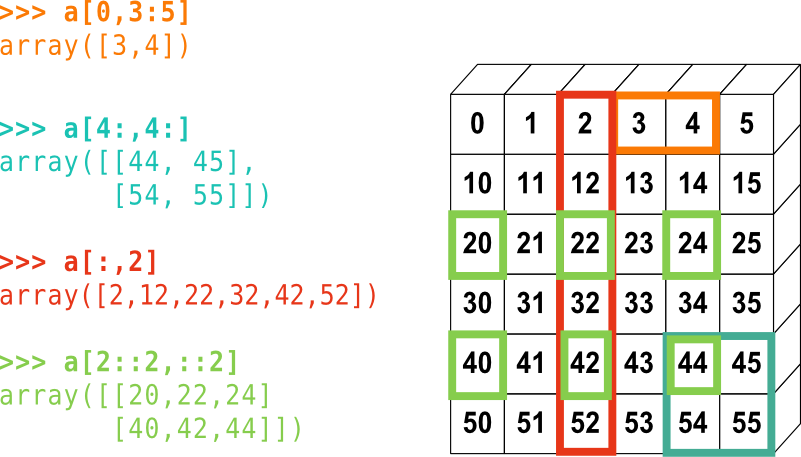

original array: [ 0  2  4  6  8 10 12 14 16 18 20] 

the mask: [ True False False  True False False  True False False  True False]
<class 'numpy.ndarray'> 

the filtered array: [ 0  6 12 18] 

selection of indexes:  [20 30 20 40 20] 

[[ 6  8]
 [18 14]]


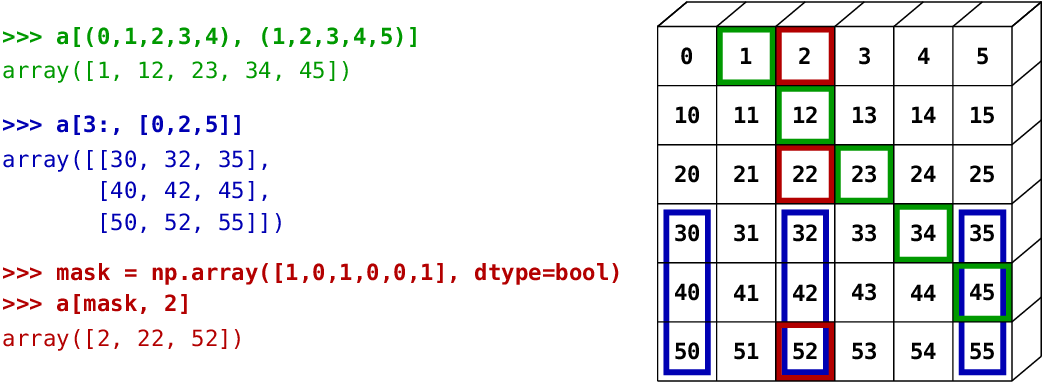

In [7]:
# SLICING:
arr1[3]                             # accedo al terzo elemento di arr1 (si conta da 0 come al solito)
arr1[-2]                            # accedo al penultimo elemento (si possono usare indici negativi!!)
arr2[0,2]                           # accedo all'elemento in prima riga e terza colonna di arr2
# per prendere piú elementi insieme:
arr1[0:2]                           # prendo gli elementi dal primo (compreso) al terzo (ESCLUSO)

# more advanced examples in the image:
from IPython.display import Image, display
display(Image("numpy_indexing.png", width=400))


# FANCY INDEXING:
a = np.arange(0, 21, 2)
print("original array:", a,'\n')

mask = (a % 3 == 0)    # array (numpy) di booleani
print("the mask:", mask)
print(type(mask),'\n') 

filtered_a = a[mask]
# equivalent to a[a%3==0]
print("the filtered array:", filtered_a,'\n')

# using integers instead of booleans:
a = np.arange(0, 100, 10)
l = [2, 3, 2, 4, 2] # l is a python list
print("selection of indexes: ", a[l], '\n')

# When a new array is created by indexing with an array of integers, the new array has the same shape as the array of integers:
a = np.arange(0, 20, 2)
idx = np.array([[3, 4],[9, 7]]) # note the shape and the ordering
print(a[idx])

# more advanced examples at:
display(Image("numpy_fancy_indexing.png", width=500))

### OPERATIONS WITH ARRAYS
By default, all aritmetic operations (additions +, subtractions -, multiplications *, ...) with arrays are performed element-wise!! To do things like matrix multiplications that require specific algorithms, we have to use proper numpy functions:
* `np.dot(a,b)`: restituisce il prodotto scalare tra due vettori, oppure il prodotto matriciale tra due matrici ( o il prodotto matrice-vettore)
* `np.outer(a,b)`: restituisce la matrice data da (a) x (b)^T (cioè a per b trasposto)
* `np.cov(a,b)`: restituisce la matrice di covarianza tra due set di dati. Volendo si può dare in input molteplici set di dati, o anche uno solo (in quel caso ritorna solo la varianza)
* `np.array_equal(a, b)`: confronta due array e restituisce True se sono esattamente uguali (stesso tipo, forma e valori) e False altrimenti
* `np.logical_and(a, b)`: esegue un AND logico tra due array, operando elemento per elemento (similmente np.logical_or)
* `np.triu(M)`: estrae la parte triangolare superiore di una matrice, impostando tutti gli elementi al di sotto della diagonale principale a zero
* `nome_matrice.T`: restituisce una view alla matrice trasposta
* `np.meshgrid(a, b, c...)`: Crea griglie coordinate a partire da vettori unidimensionali, e ritorna una tupla di array multidimensionali contenenti le coordinate delle griglie. Utile per creare griglie di punti per visualizzare funzioni in 2D o 3D.
* `np.real_if_close(a, tol)`: Converte un array di numeri complessi in numeri reali se le parti immaginarie degli elementi sono sufficientemente vicine a zero (entro una tolleranza definita)
* `np.histogram(a, bins=10)`: divide i dati di input a in gruppi (bins) e restituisce una tupla di due array: *hist* è un array con i conteggi (o densità) per ogni bin), *bin_edges* un array con i bordi dei bin (lunghezza = len(hist) + 1).

In fisica tipicamente al posto di equal si usa `np.allclose(a, b, rtol=1e-05, atol=1e-08)`, che determina se due array sono uguali elemento per elemento entro una certa tolleranza, dove a, b sono gli array da confrontare, rtol la tolleranza relativa, atol la tolleranza assoluta.

Note: The outer product of two vectors is given by $v\otimes w=vw^t$. 
Note that $v$ and $w$ are column vectors. The result is a matrix.

Nota: Let's recall the definition of the covariance matrix:
${\rm Cov}(X_i,X_j)=\frac{\sum_{h=1}^n (X_{hi}-\bar{X_i})(X_{hj}-\bar{X_j})}{n-1}$
with Cov$(X,X)$ the variance of the variable $X$.

In [29]:
arr = np.array([1,2,3,4,5])

arr = arr*5                            # moltiplico tutti i valori dell'array per 5 (non si poteva fare con le liste!!)
arr = arr + 3                          # sommo 3 a tutti i valori dell'array (non si poteva fare con le liste!!)
arr = 2**arr                           # elevo a potenza di 2 ciascun elemento di arr

arr1 = np.array([1,2,3,4,5])
np.dot(arr, arr1)                      # scalar product

1376534784

In [30]:
x = np.array([1,2,3,4,5])
y = np.array([6,7,8,9,10])
X, Y = np.meshgrid(x, y)
print(X)
print(Y)

[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]]
[[ 6  6  6  6  6]
 [ 7  7  7  7  7]
 [ 8  8  8  8  8]
 [ 9  9  9  9  9]
 [10 10 10 10 10]]


N.B.: a linear algebra package exists in numpy and is called `numpy.linalg`. However, in terms of performance, the package included in `scipy` (the library subject of a future class), also called `scipy.linalg`, is better and more efficient.

### REDUCTIONS

Operations that reduce the dimensionality of arrays are called *reductions*. The reduction functions operate on the elements of an array and return a (set of) scalar(s), and are available either as methods of the array class or as numpy functions. 
In dimensions higher than one, the axis has to be specified.

Eccone alcune:
* `np.sum()`: Restituisce la somma degli elementi lungo un asse o di tutto l'array.
* `np.max()`: Restituisce il valore massimo tra gli elementi dell'array (similmente *np.min()* ).
* `np.argmin()`: Restituisce l'indice dell'elemento con il valore minimo nell'array.
* `np.argmax()`: Restituisce l'indice dell'elemento con il valore massimo nell'array.
* `np.mean()`: Restituisce la media aritmetica degli elementi lungo un asse o di tutto l'array.
* `np.median()`: Restituisce la mediana degli elementi lungo un asse o di tutto l'array.
* `np.std()`: Restituisce la deviazione standard degli elementi lungo un asse o di tutto l'array.
* `np.cumsum()`: Restituisce un array con le somme cumulative degli elementi lungo un asse o di tutto l'array.

In [57]:
a = np.arange(1,7)
print(a)
print("sum:", a.sum(), np.sum(a))
print("max:", a.max(), np.max(a))
print("median:", np.median(a)) # median is not a method of the array class..
print("standard deviation:", a.std(), np.std(a), '\n')

# in higher dimensions:
m = a.reshape(3,2)
print(m)
print("sum along the columns:", m.sum(axis=0))
print("sum along the rows:", m.sum(axis=1))

[1 2 3 4 5 6]
sum: 21 21
max: 6 6
median: 3.5
standard deviation: 1.707825127659933 1.707825127659933 

[[1 2]
 [3 4]
 [5 6]]
sum along the columns: [ 9 12]
sum along the rows: [ 3  7 11]


### BROADCASTING
We have seen element-wise operations on arrays, which work only on arrays of the same rank and shape. Nevertheless, it’s also possible to do operations on arrays of different sizes if NumPy can transform (broadcast) these arrays so that they all have the same size.

Useful commands:
* `np.tile(a, reps)`: Replica un array un numero specificato di volte lungo ogni asse (reps could be a tuple, meaning rows and columns repetitions)
* `np.newaxis`: permette di aggiungere nuove dimensioni a un array esistente, creando una nuova dimensione. Puoi posizionare np.newaxis ovunque all'interno dell'operazione di slicing per controllare dove viene inserita la nuova dimensione
* `np.resize(a, new_shape)`; Cambia la forma di un array a una forma specificata. È simile a *reshape*, ma qua se la nuova forma è più grande dell'originale, gli elementi vengono ripetuti per riempire la nuova forma. Se la nuova forma è più piccola, gli elementi in eccesso vengono troncati. Dunque è meno sicuro di reshape.

Tiled array: 
 [[1 2 1 2 1 2]
 [3 4 3 4 3 4]
 [1 2 1 2 1 2]
 [3 4 3 4 3 4]] 

[[1 2 3]]
(1, 3)
(1, 2, 2)
resizing: 
 [0 1 2 3 0 1 2 3 0] 



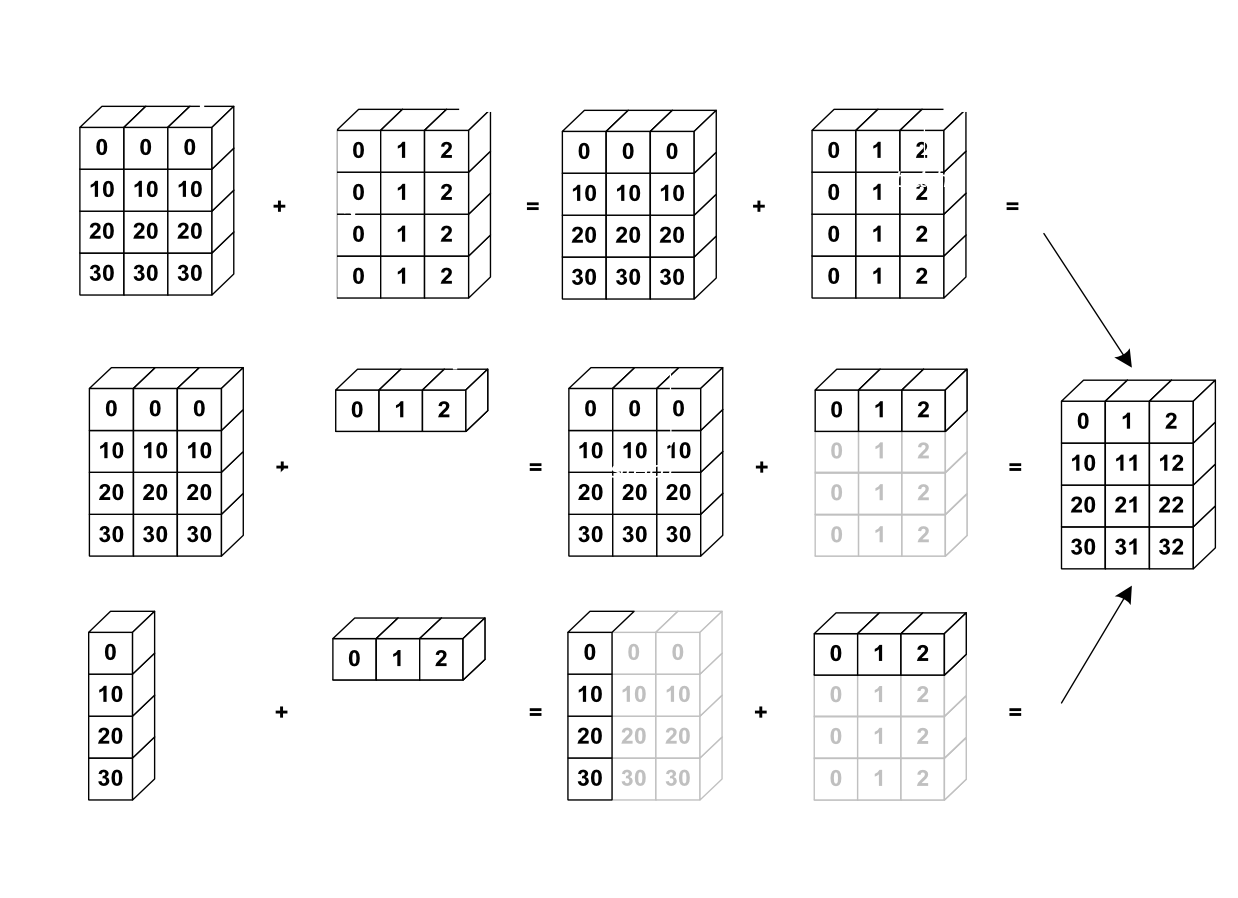

In [8]:
# Esempio di np.tile:
arr = np.array([[1, 2], 
                [3, 4]])
tiled_arr = np.tile(arr, (2, 3))  # mi copia arr in 2 righe e 3 colonne
print("Tiled array: \n", tiled_arr, '\n')

# adding a dimension (useful for linear algebra)
arr = np.array([1, 2, 3])
row_vector = arr[np.newaxis, :]       # aggiungo dimensione riga
print(row_vector)
print(row_vector.shape) 
# In 2D:
arr_2d = np.array([[1, 2], 
                   [3, 4]])
new_arr = arr_2d[np.newaxis, :, :]
print(new_arr.shape)

# resizing
print ("resizing:", '\n', np.resize(np.arange(4), (9,)), '\n')


display(Image("numpy_broadcasting.png", width=500))

In [35]:
# np.histogram da aggiungere

### NUMERI CASUALI CON NUMPY
Con Numpy possiamo generare numeri (pseudo) casuali importando numpy.random con `from numpy import random as npr`. Per ottenere risultati riproducibili possiamo fissare il seed di generazione dei numeri casuali con `npr.seed(numero)`.
* `npr.rand(a,b,c..)`: Genera numeri casuali distribuiti uniformemente tra 0 e 1 in un array di dimensioni axbxc...
* `npr.randn(a,b,c..)`: Genera numeri casuali distribuiti normalmente (gaussiana) con meida 0 e varianza 1 in un array di dimensioni axbxc...
* `npr.normal(mean, std, size)`: Genera numeri casuali distribuiti normalmente (a campana di Gauss), con una media e deviazione standard specificabili e forma dell'array data
* `npr.randint(low, high, size)`: Genera numeri interi casuali all'interno di un intervallo specificato.
* `npr.choice(a, size, replace=True, p)`: Seleziona casualmente elementi da un array dato a, potendo specificare quanti prenderne, se sono ammesse ripetizioni e potendo dare un array di probabilità associate agli elementi
* `npr.shuffle(a)`: Mescola in modo casuale gli elementi di un array lungo il primo asse.
* `npr.uniform(low, high, size)`: Genera numeri casuali distribuiti uniformemente tra un minimo e un massimo.
* `npr.exponential(lambda, size)`: Genera numeri casuali secondo una distribuzione esponenziale $\lambda e^{-\lambda x}$
* `npr.multinomial(n, pvals, size)`:  Genera campioni da una distribuzione multinomiale, dove n è il numero di prove e pvals è un array contenente le probabilità di ciascun esito

In [136]:
from numpy import random as npr      # dobbiamo prima importare i numeri casuali
npr.seed(1234)                       # fix seed for reproducible result

x = npr.rand(5,3)                    # matrice di 5x3 numeri reali tra 0 e 1
x = npr.normal(size=1000)            # array di 1000 numeri distribuiti come una gaussiana con media 0 e dev std 1
arr = npr.randint(1000, size=5)      # array formato da 5 numeri interi casuali tra 0 e 1000
print(arr)
arr = npr.randint(1000, size=(2,3))  # matrice formato da 2x3=6 numeri casuali tra 0 e 1000
print(arr)
print(npr.choice(x))                 # cosi scelgo un elemento a caso di x
arr_scelti = npr.choice(x, size=3)   # array di 3 elementi casuali tra quelli di x (anche ripetuti)
print('')

# Esempio: tossing a dice
roll = 1./6
x = npr.multinomial(20000, [roll]*6, size=2)
print ("frequencies of 6-faces dice tossing (two players):",'\n', x)

[429 799 128 289 929]
[[993 642 964]
 [580 668 714]]
0.24370865185047313

frequencies of 6-faces dice tossing (two players): 
 [[3397 3308 3326 3275 3318 3376]
 [3308 3277 3386 3347 3284 3398]]


# PANDAS
The numpy module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools. We can import it with `import pandas as pd`.

In particular `pandas` features a fast and efficient "DataFrame" object for data manipulation with integrated indexing; tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5); aggregating or transforming data with a powerful "group-by" engine.

In [2]:
import pandas as pd

### SERIES
Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 

* `pd.Series(data, index, dtype)`: Trasforma qulasiasi lista/array in una *series*, ovvero una struttura dati unidimensionale simile a un array. È possibile specificare gli indici e il tipo di dato. Può contenere dati di qualsiasi tipo.
* `nome_serie.index`: ritorna un array numpy degli indici della series
* `nome_serie.values`: ritorna un array numpy dei valori della series

In [13]:
arr = pd.Series( [5,6,7,8,9] )   # series con indici associati automaticmaente
print(arr)
print(arr.index)

0    5
1    6
2    7
3    8
4    9
dtype: int64
RangeIndex(start=0, stop=5, step=1)


The **slicing** is the same:

In [20]:
# Extracting elements and operations: same as numpy array
arr[:3]
arr[::3]
arr[arr>3]      # useful trick, it takes only the elements greater than 3
print ("mean:", np.mean(arr), "    std:" ,np.std(arr), '\n')   # integration with numpy methods

mean: 7.0     std: 1.4142135623730951 



A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [23]:
s = pd.Series(np.arange(5))
print(s)
s = s[1:] + s[:-1]       # the missing elements will have "Not a number" value instead of giving error
print(s)

0    0
1    1
2    2
3    3
4    4
dtype: int64
0    NaN
1    2.0
2    4.0
3    6.0
4    NaN
dtype: float64


### TIME SERIES
Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`. Its useful `import datetime as dt`. To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases).

Methods:
* `dt.today()`: Restituisce la data corrente.
* `pd.Timestamp(year, month, day, hour, minute, second)`: Crea un oggetto Timestamp, che rappresenta una singola data/ora. Usando `.value` mi ritorna il numero di nanosecondi da quella data
* `pd.date_range(start=None, end=None, periods=None, freq='D')`: Genera una sequenza di date tra due intervalli o per un numero specifico di periodi. Esempio: *pd.date_range(start='2024-01-01', end='2024-01-10')*
* `pd.to_datetime(arg)`: Converte stringhe, numeri o altri formati in oggetti Pandas 

In [24]:
import datetime as dt
date = dt.date.today()
print(date)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')

2024-12-27


### DATAFRAME
A pandas DataFrame is like a simple tabular spreadsheet, una struttura dati bidimensionale con righe e colonne. Each column in a DataFrame is a Series object.  The element can be whatever, missing data are dealt with too (as NaN=Not a Number).

For taking in data from external files as DataFrames we can use `pd.read_csv(file_name, sep, usecols, skiprows, dtype)`, where we can specify the separatore, the clumns to be read, how many roes to skip, the type of data.

Methods:
* `pd.DataFrame(data, index=None, columns=None, dtype=None)`: Crea un DataFrame partendo da liste, series, altri dataframe ecc. Si possono specificare gli indici per le righe e per le colonne, oltre che il tipo di dati.
* `.head(x)`: Restituisce le prime x righe del DataFrame.
* `.tail(x)`:  Restituisce le ultime x righe del DataFrame.
* `.index`: Restituisce l'indice del DataFrame come array Numpy.
* `.columns`: Restituisce gli indici delle colonne del DataFrame come array Numpy.
* `.values`: Restituisce i dati del DataFrame come array NumPy.
* `.describe()`: Fornisce statistiche descrittive per le colonne numeriche. Calcola statistiche come: count (numero di valori non nulli), mean (media), std (deviazione standard), minimo, percentili 25%, 50%, 75%, massimo.
* `.T:` Trasposta del DataFrame (scambia righe con colonne).
* `.sort_index(axis=0, ascending=True)`: Ordina il DataFrame per indice (righe o colonne).
* `.sort_values(by='col', ascending=True)`: Ordina il DataFrame in base ai valori di una o più colonne. Esempio: *df.sort_values(by=['col1', 'col2'])*

In [11]:
data = {'A': [1, 2, 3, 6, 9], 'B': [4, 5, 6, 6, 7], 'C': [13, 15, 16, 17, 18]}   # questo è un dict
df = pd.DataFrame(data)
df.describe()

,A,B,C
count,5.000000,5.000000,5.000000
mean,4.200000,5.600000,15.800000
std,3.271085,1.140175,1.923538
min,1.000000,4.000000,13.000000
25%,2.000000,5.000000,15.000000
50%,3.000000,6.000000,16.000000
75%,6.000000,6.000000,17.000000
max,9.000000,7.000000,18.000000


#### SLICING
Metodi di selezione:
* `.loc[row_labels, column_labels]`: Accesso a righe e colonne in base a etichette (o anche singoli elementi).
* `.iloc[row_positions, column_positions]`: Accesso a righe e colonne in base alla posizione (indice numerico).
* `.at[row_label, column_label]`: Accesso veloce a un singolo valore in base a etichetta.
* `.iat[row_position, column_position]`: Accesso veloce a un singolo valore in base alla posizione (indice numerico).
* `.apply(func)`:  Applica una funzione a tutti gli elementi.
* `.copy()`: Restituisce una (deep) copy del DataFrame.
* `.drop(labels, axis)`: Rimuove righe o colonne. Esempio: *df.drop('col1', axis=1)*
* `.dropna(axis)`: Rimuove righe o colonne con valori nulli (axis=0 sono le righe, axis=1 le colonne).
* `.fillna(value, axis)`: Riempie i valori nulli con un valore specificato. Esempio: *df.fillna(0)*
* `.isna()`: Restituisce un DataFrame o una Series booleana in cui i valori NaN sono rappresentati come True e i valori non NaN come False

NOTA: Pandas non accetta la sintassi *dataframe[riga,colonna]*, devi usare uno dei metodi mostrati sopra

In [12]:
data = {'A': [1, 2, 3, 6, 9], 'B': [4, 5, 6, 6, 7], 'C': [13, 15, 16, 17, 18]}   # questo è un dict
df = pd.DataFrame(data)

df['A']                 # colonna 'A'
df[0:3]                 # righe dalla 0 alla 3 (esclusa)
df.loc[:, ['A','B'] ]   # tutte le righe, colonne A e B
df.iloc[:, 0:2 ]        # tutte le righe, colonne A e B
df.iat[0,0]             # primo elemento della tabella

# Filter by a boolean condition on the values of a single column
print( df[df['B'] > 5]  )   # it prints only the rows where the element on column B is greater than 5

# Selecting on the basis of boolean conditions applied to the whole DataFrame:
print( df[df>5]  ) # a DataFrame with the same shape is returned, with NaN's where condition is not met

# defining a brand new column
df['D'] = np.arange(len(df))*0.5
print(df)

# dropping rows/columns:
df = df.drop(0, axis=0)     # dropping the first row
df = df.drop('D', axis=1)   # occhio: per togliere una colonna serve axis=1, non 0
print(df)

   A  B   C
2  3  6  16
3  6  6  17
4  9  7  18
     A    B   C
0  NaN  NaN  13
1  NaN  NaN  15
2  NaN  6.0  16
3  6.0  6.0  17
4  9.0  7.0  18
   A  B   C    D
0  1  4  13  0.0
1  2  5  15  0.5
2  3  6  16  1.0
3  6  6  17  1.5
4  9  7  18  2.0
   A  B   C
1  2  5  15
2  3  6  16
3  6  6  17
4  9  7  18


### OPERATIONS ON DATAFRAMES
Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast due to several intrinsic optimizations.

Methods:
* `.mean(axis)`:  calcola la media dei valori numerici presenti in un DataFrame
* `pd.concat([df1, df2, ...], axis, ignore_index=False)`:  Combina DataFrame lungo un asse specifico (righe o colonne), potendo indicare su quale asse e se mantenere gli indici (=Flase) o crearne di nuovi (=True).
* `pd.merge(df1, df2, on, how='inner')`:  Combina DataFrame in base a una o più colonne comuni (on). Con *how* possiamo decidere se tenere solo le righe comuni in quella colonna (how='inner'), tutte quelle del primo dataframe (='left') o secondo (='right'), o tutte le righe di entrambi (='outer').
* `df1.join(df2, how='left', on=None)`: unisce il secondo DataFrame al primo in base ai loro indici comuni. È come una versione semplificata di *pd.merge()*.

Refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples.

In [66]:
# Concatenazione verticale:
gen = {'Prodotto': ['A', 'B', 'C'], 'Quantità': [10, 15, 20]}
df_gen = pd.DataFrame(gen)
feb = {'Prodotto': ['A', 'B', 'D'], 'Quantità': [12, 18, 25]}
df_feb = pd.DataFrame(feb)
df_tot = pd.concat([df_gen, df_feb], axis=0, ignore_index=True)
print(df_tot, '\n')

# Merge:
cli = {'ID': [1, 2, 3], 'Nome': ['Alice', 'Bob', 'Charlie']}
df_cli = pd.DataFrame(cli)
ord = {'ID': [1, 2, 4], 'Prodotto': ['A', 'B', 'C']}
df_ord = pd.DataFrame(ord)
df_merged = pd.merge(df_cli, df_ord, on='ID', how='inner')
print(df_merged, '\n')

# Join:
df1 = pd.DataFrame({'A': [1, 2, 3]}, index=['a', 'b', 'c'])
df2 = pd.DataFrame({'B': [4, 5]}, index=['a', 'b'])
df_joined = df1.join(df2)
print(df_joined)

  Prodotto  Quantità
0        A        10
1        B        15
2        C        20
3        A        12
4        B        18
5        D        25 

   ID   Nome Prodotto
0   1  Alice        A
1   2    Bob        B 

   A    B
a  1  4.0
b  2  5.0
c  3  NaN


For tasks on extremely large datasets, libraries like [Polars](https://docs.pola.rs) or [Dask](https://www.dask.org) can offer even faster alternatives by further parallelizing or optimizing columnar operations.

### GROUPING
By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria (like having same values on a column)
* Applying a function to each group independently
* Combining the results into a data structure

La sintassi è `df.groupby(by).func()`, dove con by='nome_colonna' identifichiamo la colonna di raggruppamento, a cui poi applichiamo una funzione nota (o anche una funzione custom). Nel caso si vogliano applicare (aggregare) più funzioni si usa: `df.groupby(by).agg([func1, func2, ...])`.

Alcune funzioni applicabili sono:
* `.sum()`: Calcola la somma dei valori numerici all'interno di ciascun gruppo. 
* `.mean()`: Calcola la media dei valori numerici all'interno di ciascun gruppo. 
* `.count()`: Conta il numero di elementi non-NaN all'interno di ciascun gruppo. ( *.size()* è simile ma conta anche i valori NaN)
* `.min()`: Trova il valore minimo all'interno di ciascun gruppo.
* `.max()`: Trova il valore massimo all'interno di ciascun gruppo.
* `.filter(func)`: Applica una funzione a ciascun gruppo e mantiene solo i gruppi per i quali la condizione/funzione restituisce True.
* `.transform(func)`: Applica una funzione a ciascun gruppo e il risultato viene "broadcast" a tutte le righe del gruppo.
* `.apply(func)`: Applica una funzione arbitraria a ciascun gruppo.
* `.stack()`: Rimodella un DataFrame, trasformando i livelli dei suoi indici o colonne in un nuovo livello dell'indice. In pratica, prende un DataFrame "largo" (con molte colonne) e lo rende più "alto" (con più righe e meno colonne), spostando i livelli da una dimensione all'altra.

More info in the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html).

In [80]:
data = {'Prodotto': ['A', 'B', 'A', 'C'], 'Quantità': [10, 15, 8, 12]}
df = pd.DataFrame(data)
print(df, '\n')

# Raggruppa sugli stessi valori della colonna 'Prodotto' e calcoliamo la somma dei valori in 'Quantità'
grouped = df.groupby('Prodotto')['Quantità'].sum()    
print(grouped, '\n')

# Multiple Aggregations
result = df.groupby('Prodotto').agg(['sum', 'mean'])   # sum e mean sono dei metodi veri e propri, non puoi chiamarli in altro modo!!
print(result, '\n')

# Grouping by multiple columns
df = pd.DataFrame({'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
                   'Type': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
                   'Values': [10, 20, 30, 40, 50, 60]})
result = df.groupby(['Category', 'Type']).sum()
print(result)

  Prodotto  Quantità
0        A        10
1        B        15
2        A         8
3        C        12 

Prodotto
A    18
B    15
C    12
Name: Quantità, dtype: int64 

         Quantità      
              sum  mean
Prodotto               
A              18   9.0
B              15  15.0
C              12  12.0 

               Values
Category Type        
A        X         10
         Y         20
B        X         30
         Y         40
C        X         50
         Y         60


In [92]:
df = pd.DataFrame({'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
                   'Type': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
                   'Values': [10, 20, 30, 40, 50, 60]})
print(df, '\n')

# Transform: we add group averages column to DataFrame
# here we create a new column for the group and we fill it with the means of each group
df['Group_Avg'] = df.groupby('Category')['Values'].transform('mean')
print(df, '\n')

# Filtering:
filtered = df.groupby('Category').filter(lambda x: x['Values'].sum() > 50)
print(filtered)

  Category Type  Values
0        A    X      10
1        A    Y      20
2        B    X      30
3        B    Y      40
4        C    X      50
5        C    Y      60 

  Category Type  Values  Group_Avg
0        A    X      10       15.0
1        A    Y      20       15.0
2        B    X      30       35.0
3        B    Y      40       35.0
4        C    X      50       55.0
5        C    Y      60       55.0 

  Category Type  Values  Group_Avg
2        B    X      30       35.0
3        B    Y      40       35.0
4        C    X      50       55.0
5        C    Y      60       55.0


In Pandas `pd.MultiIndex` crea un indice gerarchico per i DataFrame, consentendo di organizzare i dati in modo più complesso rispetto a un semplice indice. Immagina un DataFrame come una tabella con righe e colonne: un MultiIndex ti permette di creare una tabella con più livelli di indici, come se avessi delle "sotto-tabelle" all'interno della tabella principale. Il metodo `from_product` è un metodo di classe di pd.MultiIndex che viene utilizzato per creare un MultiIndex da una serie di iterabili. In sostanza, crea tutte le possibili combinazioni degli elementi di questi iterabili.

In [99]:
# Crea un MultiIndex
indice = pd.MultiIndex.from_product([['A', 'B'], ['uno', 'due']])
# Crea un DataFrame con il MultiIndex
data = {'valore': [1, 2, 3, 4], 'boh': [5, 6, 7, 8]}
df = pd.DataFrame(data, index=indice)
print(df)

# Seleziona tutti i dati per il livello 'A'
print(df.loc['A'])

       valore  boh
A uno       1    5
  due       2    6
B uno       3    7
  due       4    8
     valore  boh
uno       1    5
due       2    6


In [104]:
data = {'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
                   'Type': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
                   'Values': [10, 20, 30, 40, 50, 60]}
df = pd.DataFrame(data)
df_stacked = df.stack()
df_stacked

0  Category     A
   Type         X
   Values      10
1  Category     A
   Type         Y
   Values      20
2  Category     B
   Type         X
   Values      30
3  Category     B
   Type         Y
   Values      40
4  Category     C
   Type         X
   Values      50
5  Category     C
   Type         Y
   Values      60
dtype: object

# MATPLOTLIB
É una libreria che permette di rappresentare grafici di dati e funzioni. Si importa con `from matplotlib import pyplot as plt`. 

There are essentially two kinds of plots you'll ever want to make, histograms and scatter plots.

HISTOGRAMS:
Histograms represent scalar functions, $f(x): {\rm I\!R}^n \to {\rm I\!R}$, where at most $n=2$. They are generally used to display the feature of a data distribution. Choosing the number of bins and the bins sizes needs a lot of care. Typically the content of each $i$-th bin, $N_i$, should be statistically significant, i.e. the corresponding Poisson (relative) uncertainty, $\sqrt{N_i} / N_i =  1/\sqrt{N_i}$, should be small. Actually the definition of normalization factor could be ambiguous; it could either be $N$ or 
$I=\int f(x) dx$, but the latter is less used, only when the bins has different base length. When we don't care about normalization, we can use "a.u." which means arbitrary units.

SCATTER PLOTS:
Scatter plots are used to compare two quantities, mainly aiming at displaying possible correlations between them. Scatter plots can be binned or unbinned, the latter case is often prefered until the number of point isn't too large. In that case the former is preferred, with a color code indicating the "3rd dimension", i.e. the relative population of each bin.

General note: Text inside dollar signs ($) utilizes LaTeX markup

In [3]:
from matplotlib import pyplot as plt

### PLOT
What we generally call a 'plot' is a hierarchy of nested Python objects (see image below): 
* A **Figure** object is the outermost container for a matplotlib graphic, which can contain multiple Axes objects. 
*  **Axes** actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).
*  **Plot** is tecnically the actual plot of the data/function

A Figure object is like a container holding one or more Axes (actual graphs). Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes.

The methods are:
* `plt.figure(figsize=(width, height), facecolor='w', edgecolor='k')`: Crea una nuova figura (chiamata ad esempio fig). Con *facecolor* specifico il colore dello sfondo, con *edgecolor* quello del bordo.
* `fig.add_subplot(nrows, ncols, index, projection=None)`: Aggiunge uno o più nuovi Axes (chiamati ad esempio ax) a una figura esistente. Si possono specificare quanti plot avere nella figure e a quale indice corrisponde quello che si sta creando. *projection='3d'* serve per i plot 3D.
* `ax.plot(x, y, color='b', linewidth=1.0, linestyle='-')`: Traccia una linea o un insieme di punti (di coordinate x e y) all'interno di un Axes, potendo specificare colore, spessore, stile ecc
* `ax.stackplot(x, *y, labels=None, colors=None, alpha=None)`: Crea grafici ad area impilati. Questi grafici rappresentano più serie di dati impilate una sull'altra. x sono le ascisse, *y una serie di liste di daty delle ordinate, labels una lista di etichette (una per ogni serie di dati). Poi ci sono colore e trasparenza


Personalizzazioni del grafico (dell'axes):
* `ax.set_title('titolo')`: setta titolo grafico.
* `ax.set_xlabel('asse x')`: setta nome asse x (similmente per asse y).
* `ax.legend([graf1, graf2, ...])`: Aggiunge una legenda al grafico.
* `ax.grid()`: disegna una griglia.
* `ax.set_xlim(min, max)`: Imposta i limiti dell'asse x (similmente per asse y).
* `ax.set_xticks(ticks)`: Imposta le posizioni dei tick sull'asse x (similmente per asse y).
* `ax.set_xticklabels(labels)`: Imposta le etichette dei tick sull'asse x (similmente per asse y).
* `ax.tick_params(axis='x', direction='in', length=10)`: Personalizza l'aspetto dei tick (direzione, lunghezza, ecc.).
* `ax.set_facecolor('colore')` Imposta il colore di sfondo dell'Axes.
* `ax.set_xscale(value)`: Imposta la scala dell'asse (x in questo caso) di un grafico. Esempio: *ax.set_xscale('log')*
* `ax.errorbar(x, y, yerr, xerr, fmt='')`: crea un grafico con barre di errore (su x e/o su y), e con fmt decidiamo il marker ('o', '-', ...)

Un modo comodo e rapido per creare la struttura è usare: 

`fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(width, height), sharex=False, sharey=False)`
In questo modo definiamo direttamente la figure e il numero di axes da creare, oltre che poter specificare se usare degli assi in comune. Per accedere ai singoli axes (grafici) si userà *axs[0]* ecc.

Nota: in *fig, _ = plt.subplots()* we use od underscore is a convention, and it menas "serveral other things"

NOTA: con `plt.subplot2grid(...)` consente di inserire un grafico all'interno di una griglia di sub-plot in modo flessibile, dove puoi specificare la posizione e l'estensione di un grafico su più righe o colonne. È particolarmente utile quando vuoi avere più controllo su come i grafici sono distribuiti sulla figura.

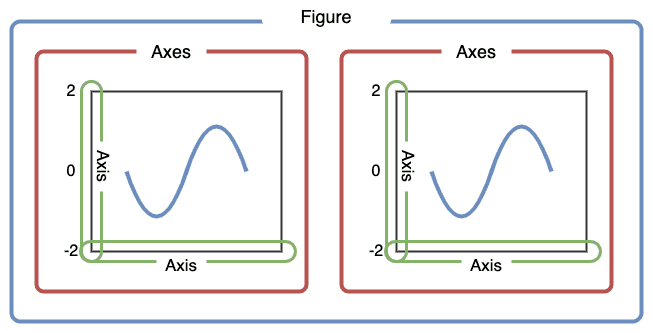

In [170]:
from IPython.display import Image, display
display(Image("matplotlib_figure_axes_axis.png", width=400))

Per grafici semplici si può pocedere direttamente con `plt.plot()` senza definire *figure*, *axes* ecc. Questo approccio è detto *Stateful* ("state-machine interface"). Usare invece figure, axes ecc è chiamato approccio *Stateless* (Object-Oriented Approach).

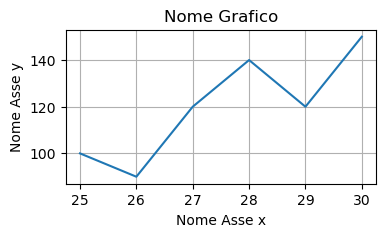

In [4]:
x = [25,26,27,28,29,30]
y = [100,90,120,140,120,150]

# se non si specifiano figure e axes, li fa python di default:
plt.figure(figsize=(4,2)) # riga scritta solo per le dimensioni ma usando plt.plot era opzionale
plt.plot(x,y)                     # plottiamo i dati x e y in un grafico
plt.title('Nome Grafico')
plt.xlabel('Nome Asse x')
plt.ylabel('Nome Asse y')
plt.grid()                        # cosi aggiungo una griglia al grafico
plt.savefig('nome_grafico.png')   # cosi salvo il grafico come png
plt.show()                        # mostriamo a schermo il plot

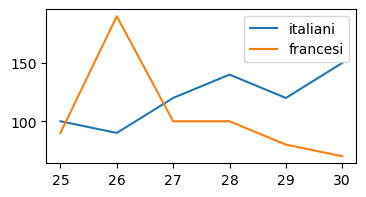

In [5]:
# Posso anche plottare piu set di dati nello stesso grafico:
y_1 = [90,190,100,100,80,70]

fig, axs = plt.subplots(1,1, figsize=(4,2) )
axs.plot(x,y)
axs.plot(x,y_1)
axs.legend(['italiani', 'francesi'])         # legenda per i colori delle linee nel grafico
plt.show()

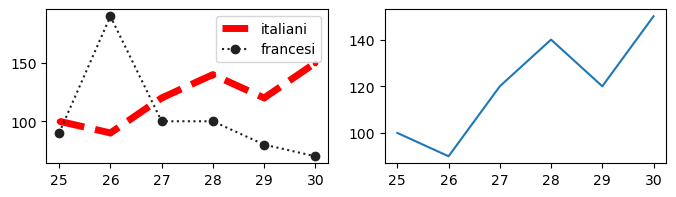

In [11]:
# Posso inserire la legenda direttamente nel plot, insieme ad altri marker, colori, tratteggio, e anche stili diversi:
fig, ax = plt.subplots(1,2, figsize=(8,2) )
ax[0].plot(x, y, label='italiani', color='red', linewidth=5, linestyle='--', marker='.')
ax[0].plot(x, y_1, label='francesi', color='#212121', linestyle='dotted', marker='o')     # il marker 'o' fa il punto dove c'é il dato
ax[1].plot(x,y)              # plottiamo i dati x e y in un grafico
ax[0].legend()
plt.show()

Esistono stili prefissati, visualizzabili con `print(plt.style.available)`, e si possono applicare globalmente con `plt.style.use('nome_stile')` oppure solo su alcuni plot/axes con `with plt.style.context('nome_stile'): codice...`.

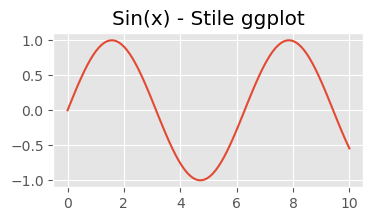

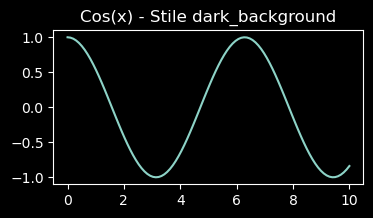

In [17]:
# Genera dei dati
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Applico stili diversi ai due subplot
with plt.style.context('ggplot'):
    fig, ax1 = plt.subplots(1, 1, figsize=(4, 2))
    ax1.plot(x, y1)
    ax1.set_title('Sin(x) - Stile ggplot')
with plt.style.context('dark_background'):
    fig, ax2 = plt.subplots(1, 1, figsize=(4, 2))
    ax2.plot(x, y2)
    ax2.set_title('Cos(x) - Stile dark_background')
plt.show()

### PERSONALIZING
Esistono vari modi di personalizzare il grafico. Ad esempio, ci sono tanti tipi di *locator* che, applicabili agli axes, permettono di personalizzare i tick e le etichette degli assi di un grafico. Un esempio è dato da `from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter`:
* **AutoMinorLocator**: Serve per aggiungere tick secondari (minor ticks) agli assi di un grafico in modo automatico. Determina la posizione dei tick secondari dividendo lo spazio tra due tick principali in un numero adeguato di intervalli.
* **MultipleLocator**: Ti permette di posizionare i tick principali (o secondari) a intervalli regolari specificati.
* **FuncFormatter**: Ti consente di personalizzare le etichette dei tick (tick labels) usando una funzione Python.

Tali locator vanno quindi applicati usando questi metodi di axes (applicabili su xaxis o yaxis):
* `ax.xaxis.set_minor_locator(locator)`: Imposta il posizionamento dei tick secondari usando un oggetto Locator (similmente per major)
* `ax.xaxis.set_minor_formatter(formatter)`: Personalizza le etichette dei tick secondari usando un oggetto Formatter
* `ax.tick_params()`: Personalizza l'aspetto dei tick principali o secondari (dimensione, colore, direzione, ecc.).
* `ax.grid()`: Attiva la griglia associata ai tick principali o secondari.
* `ax.xaxis.set_ticks(ticks, minor=False)`: Imposta manualmente le posizioni dei tick.
* `ax.xaxis.set_tick_params`: Simile a tick_params() ma per un asse specifico.
* `ax.xaxis.get_ticklocs()`: Restituisce le posizioni dei tick principali o secondari
* `ax.xaxis.get_majorticklabels()`:restituisce una lista di nomi dei tick che rappresentano i tick principali lungo un asse (similmente minor con i secondari)
* `ax.xaxis.get_major_ticks()`: restituisce una lista di oggetti tick che rappresentano i tick principali lungo un asse (similmente minor con i secondari)

Esempio: ax.xaxis.set_minor_locator(AutoMinorLocator(4))  # Suddivide in 4 tick secondari ogni spazio tra tick principali.

Esempio: ax.xaxis.set_major_locator(MultipleLocator(0.5))  # Tick principali ogni 0.5.

For more personalizations, see https://matplotlib.org/.

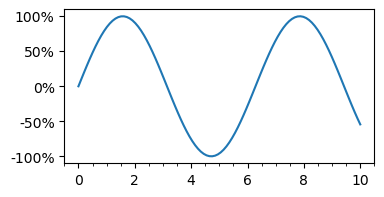

In [15]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
fig, ax = plt.subplots(figsize=(4, 2))       # Creazione della figura e degli assi
ax.plot(x, y)                  # Disegna la curva

ax.xaxis.set_major_locator(MultipleLocator(2))    # ticks principali ogni 2 unità sull'asse X
ax.xaxis.set_minor_locator(AutoMinorLocator(4))   # ticks secondari sull'asse X (4 spazi tra ticks principali)
# formatto i ticks principali dell'asse Y come percentuali ('val' e 'pos' sono le variabili matplotlib dei valori e delle loro posizioni)
ax.yaxis.set_major_formatter(FuncFormatter(lambda val, pos: f"{val * 100:.0f}%"))   

Altri metodi:
* `ax.add_artist(oggetto)`: Aggiunge manualmente un oggetto artistico (esempio: Circle, Rectangle, Line2D, ecc.) al grafico.
* `ax.annotate(text, xy, xytext=None, arrowprops=None)`: Aggiunge un'etichetta (text) in una posizione specifica (xytext) a un punto specifico del grafico (xy), con la possibilità di includere una freccia che punta a quel punto.
* `ax.text(x, y, text)`: Aggiunge testo (text) in una posizione arbitraria (x, y) del grafico, senza riferirsi a un punto specifico o aggiungere frecce. È possibile poi aggiungere personalizzazioni al testo

Text(0.1, 0.8, 'Testo generico')

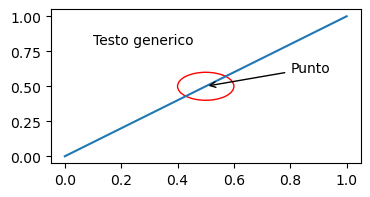

In [14]:
fig, ax = plt.subplots(figsize=(4, 2))
ax.plot([0, 1], [0, 1]) # Disegna una semplice linea

# 1. `add_artist`: Aggiunge un cerchio
circle = Circle((0.5, 0.5), 0.1, color='red', fill=False)
ax.add_artist(circle)

# 2. `annotate`: Aggiunge un'etichetta con una freccia
ax.annotate('Punto', xy=(0.5, 0.5), xytext=(0.8, 0.6), arrowprops=dict(arrowstyle='->'))

# 3. `text`: Aggiunge del testo generico
ax.text(0.1, 0.8, 'Testo generico')

### HISTOGRAM
The syntax is `plt.hist(x, bins, density=False, histtype='bar')`, con x i dati da usare, bins il numero di barre (o una sequenza di bordi), density tale che se True, l'istogramma è normalizzato per avere un'area totale di 1 (probabilità) e histtype: Il tipo di istogramma (può essere 'bar', 'step', 'stepfilled', 'barstacked').

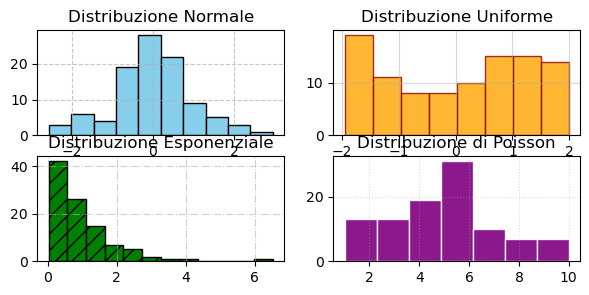

In [13]:
# Dati per i quattro istogrammi
data1 = npr.normal(0, 1, 100)  # Dati distribuiti normalmente (media=0, dev.stand.=1)
data2 = npr.uniform(-2, 2, 100)  # Dati distribuiti uniformemente
data3 = npr.exponential(1, 100)  # Dati distribuiti esponenzialmente
data4 = npr.poisson(5, 100)  # Dati distribuiti secondo una Poissoniana

# Crea la griglia 2x2 per i subplot
fig, axs = plt.subplots(2, 2, figsize=(7, 3))

# Istogramma 1
axs[0, 0].hist(data1, bins=10, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribuzione Normale')
axs[0, 0].grid(True, linestyle='--', alpha=0.7)

# Istogramma 2
axs[0, 1].hist(data2, bins=8, color='orange', edgecolor='darkred', alpha=0.8)
axs[0, 1].set_title('Distribuzione Uniforme')
axs[0, 1].grid(True, linestyle='-', alpha=0.5)

# Istogramma 3
axs[1, 0].hist(data3, bins=12, color='green', edgecolor='black', hatch='//')
axs[1, 0].set_title('Distribuzione Esponenziale')
axs[1, 0].grid(True, linestyle='-.', alpha=0.6)

# Istogramma 4
axs[1, 1].hist(data4, bins=7, color='purple', edgecolor='white', alpha=0.9)
axs[1, 1].set_title('Distribuzione di Poisson')
axs[1, 1].grid(True, linestyle=':', alpha=0.4)

### SCATTER PLOT
Il metodo .scatter() viene utilizzato per creare un grafico a dispersione (scatter plot), che visualizza la relazione tra due variabili numeriche. Ogni punto nel grafico rappresenta una coppia di valori (x, y). The syntax is:

`plt.scatter(x, y, s=None, c=None, cmap=None, alpha=None, marker=None, label=None, edgecolor=None, linewidths=None)` dove x è la sequenza dei valori sulle ascisse, y ordinate, s la dimensione dei punti, c il colore dei punti, cmap la colormap da utilizzare, alpha la trasparenza, marker il tipo di marker per i punti (ad esempio, 'o', 's', '^', ecc.), label l'etichetta per il grafico, edgecolor il colore del bordo dei punti, linewidths larghezza del bordo.

With a scatter plot it's useful to add `plt.colorbar()` to add on the side of the graph a bar with the colours legend

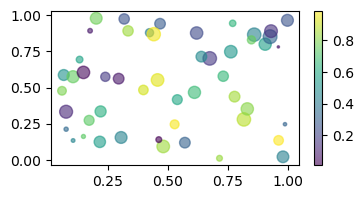

In [16]:
x = npr.rand(50)  
y = npr.rand(50)  
sizes = npr.rand(50) * 100  # Dimensioni casuali per ogni punto
colors = npr.rand(50)  # Colori casuali per ogni punto

fig, ax = plt.subplots(1, 1, figsize=(4, 2))
a = ax.scatter(x, y, s=sizes, c=colors, cmap='viridis', alpha=0.6)
plt.colorbar(a)  # Aggiunge la barra dei colori

### 2D PLOT
La funzione **plt.imshow()** serve per visualizzare array 2D sotto forma di immagini. È uno strumento utile per rappresentare graficamente matrici o funzioni valutate su una griglia. (NOTA: Per visualizzare la legenda dei colori va scritto `plt.colorbar()`).

The syntax is: 
`plt.imshow(X, cmap, aspect, extent)
`

I parametri principali sono:

* X: L'array 2D (come una matrice numpy) da visualizzare. Ogni valore in X viene mappato a un colore in base alla colormap specificata.
* cmap: Specifica la mappa di colori da utilizzare. Esempi: 'viridis', 'plasma', 'gray', 'hot'.
* aspect: Controlla il rapporto d'aspetto dei pixel. 'auto': I dati si adattano automaticamente alle dimensioni del grafico. 'equal': I pixel sono rappresentati in proporzioni corrette.
* extent: Specifica i limiti dell'immagine (le coordinate lungo x e y). Forma: [x_min, x_max, y_min, y_max].

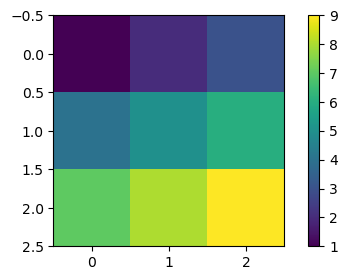

In [7]:
# Creiamo una matrice 2D semplice
data = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])
plt.figure(figsize=(6,3))

# Visualizziamo la matrice con imshow
plt.imshow(data, cmap='viridis')
plt.colorbar()  # Aggiunge una barra dei colori

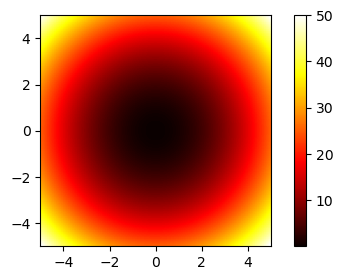

In [32]:
# Creazione di una griglia di punti (X, Y)
x = np.linspace(-5, 5, 100)  # Valori di x da -5 a 5
y = np.linspace(-5, 5, 100)  # Valori di y da -5 a 5
X, Y = np.meshgrid(x, y)     # Griglia 2D

# Calcolo del paraboloide Z = X^2 + Y^2
Z = X**2 + Y**2       # ora Z è una griglia (=matrice) coi valori del paraboloide

plt.figure(figsize=(6,3))
# Visualizzazione con imshow:
plt.imshow(Z, extent=[-5, 5, -5, 5], cmap='hot')
plt.colorbar()  # Barra dei colori

Of paramount importance is the condensation of the scatter plots into "profiles". The procedure runs as follow: data are binned along the $x$ (if you had to bin on the other variable, just invert the axes), for every bin take the mean and the standard deviation of the corresponding $y$ values, display those as data points and their error.
These are also called "box plots".

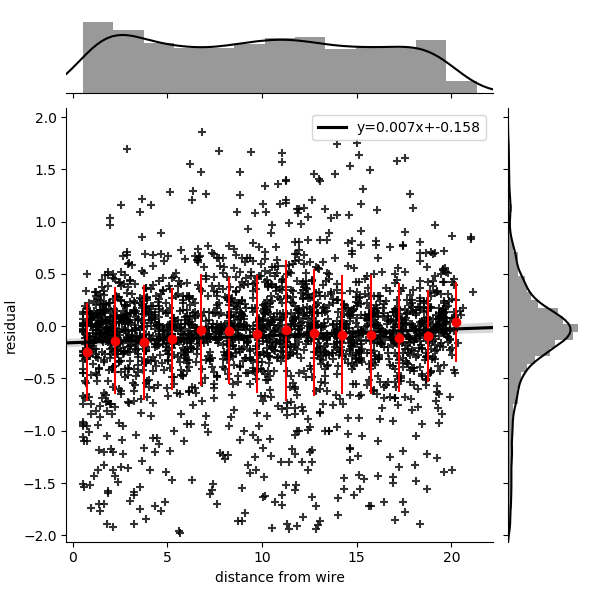

In [107]:
from IPython.display import Image
Image("profile.png", width=500)   # this is a profile plot

Other commands to add:
* plt.bar()    
* plt.xticks()                
* plt.fill_between()             
* plt.axvline()                   # aggiungo manualmente una linea verticale (utile tipo per mostrare la media ecc)

In [33]:
# in 'plt.show()' é sottintesa l'opzione 'block=True', cioé 'plt.show(block=True)'
#     ció fa sì che il grafico venga visualizzato in modo sincrono (bloccante), cioé il codice attenderà che la finestra del grafico venga chiusa prima di continuare l'esecuzione del programma

# Per GRAFICI A TORTA si usa 'plt.pie()', ai quali si possono applicare soliti stili ecc

### SEABORN
Seaborn is a wrapper around matplotlib which makes it better, with a better graphics and advanced functionalities, especially with what concerns statistical analysis.
```python
import seaborn as sns
```
See at https://seaborn.pydata.org/.

La funzione `sns.jointplot()` viene utilizzata per creare grafici congiunti (joint plots), che visualizzano la relazione tra due variabili. Combina un grafico bivariato (al centro) che mostra la relazione tra le due variabili con due grafici univariati (sulle assi) che mostrano le distribuzioni delle singole variabili. Sintassi:

`sns.jointplot(data=None, *, x=None, y=None, kind='scatter')`

Argomenti principali

    data: DataFrame o dataset contenente le variabili.
    x: Nome della variabile per l'asse X (o array di dati).
    y: Nome della variabile per l'asse Y (o array di dati).
    kind: Specifica il tipo di grafico bivariato da utilizzare. Le opzioni includono:
        scatter (default): Grafico a dispersione.
        kde: Grafico con stima della densità kernel (bidimensionale).
        hist: Istogramma bivariato.
        hex: Grafico esagonale di densità.
        reg: Grafico a dispersione con retta di regressione lineare.
        resid: Grafico dei residui.
    hue: Nome della variabile per il colore (usato per gruppi distinti).
    marginal_kws: Dizionario per personalizzare i grafici marginali (sulle assi).
    joint_kws: Dizionario per personalizzare il grafico bivariato.

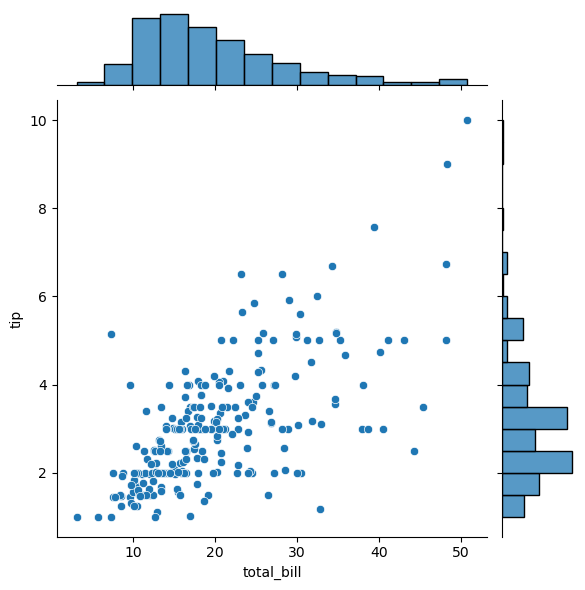

In [9]:
import seaborn as sns
# Dataset di esempio
tips = sns.load_dataset("tips")

# Grafico congiunto
sns.jointplot(data=tips, x="total_bill", y="tip")
plt.show()

# SCIPY
È una libreria che si basa su NumPy e offre una vasta gamma di funzioni avanzate per operazioni matematiche, ottimizzazione, integrazione, interpolazione, algebra lineare, statistica, e risoluzione di equazioni differenziali. SciPy è particolarmente utile per applicazioni che richiedono calcoli numerici complessi e manipolazioni di grandi dataset. Le sue funzioni sono altamente ottimizzate per performance, rendendolo ideale per l'uso in scienze, ingegneria e ricerca. È ampiamente utilizzato in machine learning, statistica e simulazioni scientifiche.

Esempi:
* The `scipy.optimize` module provides algorithms for function minimization (scalar or multi-dimensional), curve fitting and root finding.
* The `scipy.interpolate` is useful for interpolating.
* The `scipy.linalg` module provides standard linear algebra operations.
* The `scipy.stats` module contains statistical tools and probabilistic descriptions of random processes.
* The `scipy.integrate` module contains algorithms to calculate integrals.

#### SPACE COMPLEXITY
Lo space complexity di un algoritmo descrive la quantità di memoria che l'algoritmo richiede per eseguire una determinata operazione in relazione alla dimensione dell'input. In altre parole, misura quanta memoria viene utilizzata in più (oltre alla memoria per l'input) man mano che l'algoritmo elabora i dati. The notion of space complexity becomes important when your data volume is of the same magnitude or larger than the memory you have available. In that case, an algorihtm with high space complexity may end up having to swap memory constantly, and will perform far worse than its time complexity would suggest. La space complexity è generalmente espressa in notazione Big-O (O grande), che indica il tasso di crescita della memoria in relazione alla dimensione dell'input.

### LINEAR ALGEBRA
The `scipy.linalg` module provides standard linear algebra operations. We import it as `from scipy import linalg as la`. Examples:
* `la.norm(v)`: norm of a vector
* `v.dot(w)`: scalar product (known as inner product)
* `la.det(M)`: determinant of a matrix M
* `M.trace()`: trace of a matrix M
* `la.inv(M)`: inverse of a square matrix M

### MATRIX DECOMPOSITION
Often data analysis problems boil down to solving linear systems. Matrix decompositions are an important step in solving linear systems in a computationally efficient manner.
* **Lower-Upper factorization** with `P, L, U = la.lu(A)`: Let A be a square matrix (don't work in other cases). An LU factorization refers to the factorization of A, with proper row and/or column orderings or permutations, into two factors – a lower triangular matrix L and an upper triangular matrix U: $A=LU$. When solving a system of linear equations, $Ax=b=LUx$, the solution is done in two logical steps. Often a permutation $P$ is needed (partial pivoting) to best reorder the rows of the original matrix, such that $PA=LU$. The steps are:
    1. solve $Ly=b$ for $y$.
    2. solve $Ux=y$ for $x$.
* **Eigendecomposition** with `l, V = la.eig(A)`: Given an $n\times n$ matrix $A$, with $\det{A}\ne0$, then there exist n  linearly independent eigenvectors and $A$ may be decomposed in the following manner: $A=PD P^{-1}$ where $D$ is a diagonal matrix whose diagonal entries are the eigenvalues of $A$ and the columns of $D$ are the corresponding eigenvectors of $A$. The function returns *l* as an array of eigenvectors and *V* as a matrix whose columns are the eigenvectors. Nota: Se la matrice A è simmetrica o ermetiana (complessa con elementi coniugati simmetrici), puoi usare `la.eigh(A)`, che è più efficiente e restituisce sempre autovalori reali. In alternativa usa `np.real_if_close(l)`
* **Singular Value Decomposition (SVD)** with `U, spectrum, Vt = la.svd(A)`: Another important matrix decomposition is singular value decomposition or SVD. For any $m\times n$ matrix $A$ (so also non square matrixes), we may write: $A=UDV^T$ where $U$ is a orthogonal $m\times m$ matrix, $D$ (spectrum) is a rectangular, diagonal $m\times n$ matrix with diagonal entries $d_1 ,\dots,d_m$ all non-negative (the other elements are zero), $V$ is an orthogonal $n\times n$ matrix.
  
  Given an SVD of $A$, as described above, the following holds:

    $$
    A^T A = VD^TU^T UDV^T = VD^TDV^T 
    $$
    $$
    A A^T = UD^TV^T VDU^T = UD^TDU^T 
    $$

    The right-hand sides of these relations describe the eigenvalue decompositions of the left-hand sides. Consequently: the columns of V (right-singular vectors) are eigenvectors of $A^TA$, the columns of U (left-singular vectors) are eigenvectors of $AA^T$, the non-zero elements of D (non-zero singular values) are the square roots of the non-zero eigenvalues of $A^TA$ or $AA^T$.

### PRINCIPAL COMPONENT ANALYSIS (PCA)
La Principal Component Analysis (PCA) è una tecnica di riduzione della dimensionalità utilizzata per analizzare e semplificare dataset multidimensionali mantenendo il più possibile l'informazione (varianza) contenuta nei dati originali. Agisce riducendo il rumore e/o le variabili ridondanti, riuscnedo a visualizzare dataset in 2D o 3D anche quando i dati hanno molte dimensioni. Di fatto quindi trasforma le variabili originali in nuove variabili (*principal component*) che sono indipendenti tra loro. Numerically, PCA can be done either by means of eigendecomposition on the covariance matrix or via SVD on the data matrix (the latter is usually preferred).

Come funziona la PCA?

* Standardizzazione dei dati: Se le variabili hanno scale diverse, la PCA funziona meglio dopo aver standardizzato i dati (ad esempio portando ogni variabile a media 0 e varianza 1). Infatti in the case the features of the datasets have all zero mean, the covariance matrix is of the simpler form: $ {\rm Cov}(X)=\frac{XX^T}{n-1}$
* Calcolo della matrice di covarianza: La matrice di covarianza misura come le variabili sono correlate tra loro. Questo passaggio serve per identificare le direzioni (componenti) di maggiore varianza nei dati.
* Calcolo degli autovalori e autovettori (della matrice di covarianza): Gli autovalori indicano l'importanza di ciascuna direzione (quanta varianza spiega ogni componente). Gli autovettori rappresentano le direzioni principali nello spazio dei dati (i nuovi assi su cui proiettare i dati).
* Ordinamento delle componenti principali: Gli autovalori vengono ordinati in ordine decrescente per scegliere le componenti principali più rilevanti.
* Proiezione dei dati: I dati originali vengono trasformati nello spazio delle componenti principali utilizzando le direzioni degli autovettori.

Nota: La correlazione è una versione normalizzata della covarianza, che ne limita i valori tra −1−1 e +1+1. È data da: $\text{Corr}(X, Y) = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y}$

#### SVD for PCA

We saw that SVD is a decomposition of the data matrix $X=UDV^T$ where U and V are orthogonal matrices and D is a diagnonal matrix, (X is our dataset).

Compared with the eigendecomposition of a matrix $A=W\Lambda W^{−1}$, we see that SVD gives us the eigendecomposition of the matrix $XX^T$, which as we have just seen, is basically a scaled version of the covariance for a data matrix with zero mean, with the eigenvectors given by $U$ and eigenvalues by $D^2$ (scaled by n−1).

### INTERPOLATION
`scipy.interpolate` is useful for fitting a function from experimental data and thus evaluating points where no measure exists. With `interp1d` we interpolate in 1 dimension, with `griddata` in 2 dimensions, and it returns a function useful for calculating the output value on every input.
* `scipy.interpolate.interp1d(x, y, kind='linear', fill_value='extrapolate')`: qui x e y sono le coordinate e valori noti dei dati, kind è il tipo di interpolazione ('linear', 'quadratic', 'cubic', 'zero'...), fill_value='extrapolate' permette di ricavare il valori di punti fuori dominio
* `scipy.interpolate.griddata(points, values, grid, method='linear')`: qui points sono le coordinate dei punti noti, values i valori corrispettivi noti, grid i punti in cui interpolare, method è il tipo di interpolazione ('linear', 'quadratic', 'cubic', 'zero'...)
* `scipy.interpolate.UnivariateSpline(x, y, s=0, k)`: alternativa per interpolare in 1dim con opilnomi. Variando il parametro s (s>0) è possibile ottenere interpolazioni più rilassate che non toccano per forza ogni punto. k è il grado del polinomio usato (default: k=3)

Valore teorico sin(x): 1.0    linear prediction: 0.88235    cubic prediction: 0.9209538364593088


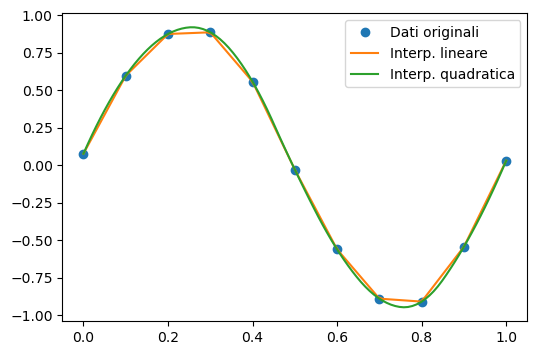

In [7]:
from scipy.interpolate import interp1d

x = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y = np.array([0.0789, 0.5989, 0.8768, 0.8879, 0.5583, -0.0278, -0.5597, -0.8881, -0.9078,
 -0.5416, 0.0322])
# the interpolation can be linear, quadratic, cubic... Con ' fill_value="extrapolate" '  gli dico di estrapolare i punti mancanti
f_lin  = interp1d(x, y, kind='linear',    fill_value="extrapolate")
f_quad = interp1d(x, y, kind='quadratic', fill_value="extrapolate")

# denser interval to plot the interpolating functions
x_new = np.linspace(0, 1, 100)
lin_result = f_lin(x_new)
quad_result = f_quad(x_new)

# Grafico
plt.figure(figsize=(6, 4))
plt.plot(x, y, 'o', label='Dati originali')
plt.plot(x_new, lin_result, '-', label='Interp. lineare')
plt.plot(x_new, quad_result, '-', label='Interp. quadratica')
plt.legend()

# checking the punctual results
x=1/4.
print ("Valore teorico sin(x):",np.sin(2 * np.pi * x), 
       "   linear prediction:",f_lin(x),
       "   cubic prediction:", f_quad(x))

ALTERNATIVA per interpolare:
from `scipy.interpolate` we could also use `UnivariateSpline`, useful for more smooth, less rigid interpolation

## FIT

If we know that the data is sampled from a specific function and we just need to find its parameters, we can do that by least squares curve fitting. 

We write `from scipy import optimize` and use `optimize.curve_fit()`, which has the syntax `params, pcov = curve_fit(f, x, y, p0, sigma, bounds=(a,b))`, where p0 are the initial parameters to try, sigma an array with the uncertainty on each y data, bounds the limits of search of parameters. NOTA: la prima variabile passata dalla funzione è considerata automaticamente la variabile indipendente


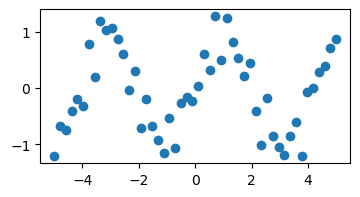

In [11]:
x = np.linspace(-5, 5, num=50)
y = np.sin(1.5 * x) + 0.3*np.random.normal(size=50)

plt.figure(figsize=(4, 2))
plt.scatter(x, y)

Parametri: [0.95450085 1.51986702]
Covarianza parametri: [[ 0.00355051 -0.00014028]
 [-0.00014028  0.00043714]]


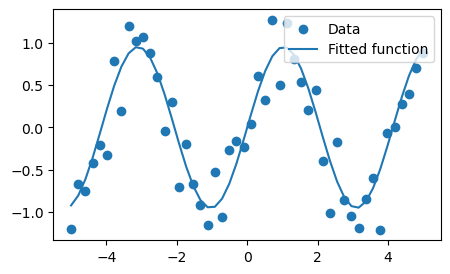

In [12]:
from scipy import optimize

# we define the known function with the two parameters to optimize
def f(x, A, nu):
    return A * np.sin(nu * x)

params, params_covariance = optimize.curve_fit(f, x, y, p0=[2, 2])  
# p0 are the guessed values for the parameters
# covariance matrix (=uncertainty)
print("Parametri:", params)
print("Covarianza parametri:", params_covariance)

plt.figure(figsize=(5, 3))
plt.scatter(x, y, label='Data')
plt.plot(x, f(x, params[0], params[1]), label='Fitted function')
plt.legend()

## FINDING THE ROOTS
Several methods are there for $f(x): {\rm I\!R} \to {\rm I\!R}$, like Newton-Raphson (`optimize.newton`), Secant method or Brent (`optimize.brentq`).

In case of $f(x): {\rm I\!R}^2 \to {\rm I\!R}$, the `optimize.root` is available, also implementing several methods.

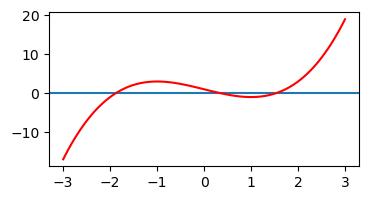

In [13]:
def f(x):
    return x**3-3*x+1

x = np.linspace(-3,3,100)
plt.figure(figsize=(4, 2))
plt.axhline(0)
plt.plot(x, f(x),'r-')

Per newton si scrive `from scipy.optimize import newton` e la sintassi usa: f come funzione di cui trovare lo zero, x0 come punto di partenza per l'algoritmo, args sono gli argomenti (parametri) da passare a f, tol la tolleranza sullo zero, maxiter il numero massimo di iterazioni):

`root = newton(f, x0, args=(), tol=1e-8, maxiter=100)`


In [14]:
from scipy.optimize import newton

# We search for the three roots in different regions:
print( newton(f,-3)  )
print( newton(f, 0)  )
print( newton(f, 3)  )

-1.8793852415718166
0.34729635533385395
1.5320888862379578


Per Brent si scrive `from scipy.optimize import brentq` e la sintassi usa: f come funzione di cui trovare lo zero, a e b gli estremi di ricerca, args sono gli argomenti (parametri) da passare a f, xtol la tolleranza sullo zero, maxiter il numero massimo di iterazioni)

`root = brentq(f, a, b, args=(), xtol=1.0e-12, maxiter=100)`


In [15]:
from scipy.optimize import brentq
print(  brentq(f, -3, 0)  )
print(  brentq(f, 0, 1)  )
print(  brentq(f, 1,3)  )

-1.8793852415718166
0.3472963553337031
1.532088886237956


Per funzioni vettoriali si scrive `from scipy.optimize import root` e la sintassi usa: f come funzione di cui trovare lo zero, x0 come punto di partenza per l'algoritmo, args sono gli argomenti (parametri) da passare a f, tol la tolleranza sullo zero:

`result = root(f, x0, args=(), tol)`


In [9]:
from scipy.optimize import root

def f(x):
    return [x[1] - 3*x[0]*(x[0]+1)*(x[0]-1),
            .25*x[0]**2 + x[1]**2 - 1]

solutions = root(f, (0.5, 0.5))
print(solutions)        # stampa resoconto
print(f(solutions.x))   # stampa soluzioni

 message: The solution converged.
 success: True
  status: 1
     fun: [-1.636e-12  1.619e-12]
       x: [ 1.117e+00  8.295e-01]
  method: hybr
    nfev: 21
    fjac: [[-9.978e-01  6.589e-02]
           [-6.589e-02 -9.978e-01]]
       r: [ 8.229e+00 -8.826e-01 -1.726e+00]
     qtf: [-1.495e-08  1.270e-08]
[-1.6360246490876307e-12, 1.6187051699034782e-12]


## MINIMIZZAZIONE
The `minimize_scalar` function will find the minimum of a scalar function, and can also be told to search within given bounds. We need `scipy.optimize import minimize_scalar`. By default, it uses the Brent algorithm. Its syntax is this, where f is the function for which i search the minimum, bounds are the limit of search,  tol is the tolerance:

`result = minimize_scalar(f, bounds, args=(), tol)`

Restituisce un oggetto con le seguenti proprietà principali ([vedi qua](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult)):

    result.x: Il valore di x che minimizza f(x).
    result.fun: Il valore minimo di f(x).

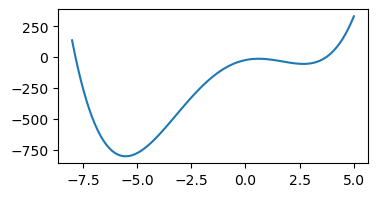

In [16]:
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1

x = np.linspace(-8, 5, 100)
plt.figure(figsize=(4,2))
plt.plot(x, f(x))

In [17]:
optimize.minimize_scalar(f, method='Brent')

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -803.3955308825884
       x: -5.528801125219663
     nit: 11
    nfev: 16

In [19]:
# ora cerchiamo un minimo relativo a destra:
optimize.minimize_scalar(f, method='bounded', bounds=[0, 6])

 message: Solution found.
 success: True
  status: 0
     fun: -54.21003937712762
       x: 2.668865104039653
     nit: 12
    nfev: 12

In alternativa si usa `optimize.minimize`: È utilizzato per la minimizzazione di funzioni multivariate, ovvero funzioni che dipendono da più variabili (x1,x2,…,xnx1​,x2​,…,xn​). La sintassi è:

`scipy.optimize.minimize(fun, x0, args=(), bounds=None, tol=None, options=None)`

Parametri Principali:
* fun: La funzione da minimizzare. Deve restituire un valore scalare.
* x0: il punto iniziale (guess iniziale) da cui parte l'algoritmo di ottimizzazione. È un array (o lista) con una dimensione uguale al numero di variabili indipendenti.
* bounds: Una lista di tuple che specificano i limiti (inferiore e superiore) delle variabili. Forma: [(x1_min, x1_max), (x2_min, x2_max), ...].
* options: Un dizionario per specificare opzioni aggiuntive come 'maxiter' (numero massimo di iterazioni)
* tol: Tolleranza per determinare la convergenza.

La funzione restituisce un oggetto di tipo OptimizeResult, che contiene i seguenti attributi principali:
* x: Il valore ottimale delle variabili.
* fun: Il valore della funzione obiettivo al minimo.
* success: Indica se l'ottimizzazione è riuscita (True o False).
* message: Un messaggio che descrive lo stato della terminazione.

### GLOBAL MINIMUM AMONG LOCAL ONES
When the function oscillates a lot, often the global minimum is not found. To solve this, several intervals needs to be explored. A function that does that, searching for the minimum in a zone and then hops casually, is `from scipy.optimize import basinhopping`, which has the syntax: 

`result = basinhopping(f, x0, niter=100, stepsize=0.5, minimizer_kwargs={'args': (a,b,)})`
Here f is the function to study, x0 is the initial point of search, niter the number of iterations (jumps), stepsize the max size of the steps, minimizer_kwargs is used for giving in the parameters of f (and also other things).

Restituisce un oggetto con le seguenti proprietà principali
* result.x: Il valore di x che minimizza f(x).
* result.fun: Il valore minimo di f(x).

                    message: ['requested number of basinhopping iterations completed successfully']
                    success: True
                        fun: -1.0
                          x: [ 5.000e+00]
                        nit: 100
      minimization_failures: 0
                       nfev: 1322
                       njev: 661
 lowest_optimization_result:  message: Optimization terminated successfully.
                              success: True
                               status: 0
                                  fun: -1.0
                                    x: [ 5.000e+00]
                                  nit: 4
                                  jac: [ 3.725e-08]
                             hess_inv: [[ 3.040e-01]]
                                 nfev: 12
                                 njev: 6

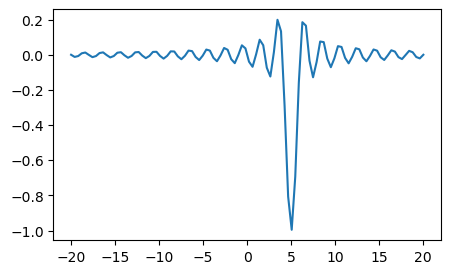

In [20]:
from scipy.optimize import basinhopping

# funzione da minimizzare:
def f(x, offset):
    return -np.sinc(x-offset)
# grafico di f
x = np.linspace(-20, 20, 100)
plt.figure(figsize=(5,3))
plt.plot(x, f(x, 5))

x0 = 0
solution = basinhopping(f, x0, stepsize=1, minimizer_kwargs={'args': (5,)})
solution

### STATISTICS
The module `scipy.stats` contains statistical tools and probabilistic descriptions of random processes.

Abbiamo a disposizione varie distribuzioni:
* `stats.norm(mean, std)`: normale (gaussiana), con media e deviazione standard: $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$
* `stats.uniform(a, b-a)`: uniforme, con estremo inferiore e lunghezza dell'intervallo: $f(x) = \frac{1}{b-a}$
* `stats.expon(a, 1/lambda)`: esponenziale, con sfasamento $a$ e inverso di $\lambda$: $f(x) = \lambda e^{-\lambda (x - \text{a})}$
* `stats.gamma(a, off, scale)`: gamma, con parametro di forma a, offset e scala M: $f(x) = \frac{1}{\Gamma(a) M^a} x^{a-1} e^{-\frac{x}{M}}, \quad x \geq \text{off}$
* `stats.chi2`: chiquadro: $f(x) = \frac{1}{2^{k/2} \Gamma(k/2)} x^{k/2-1} e^{-x/2}, \quad x \geq 0$
* `stats.binom(n, p)`: binomiale, con numero di prove e probabilità di successo: $P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}, \quad k \in \{0, 1, \dots, n\}$
* `stats.poisson(mu)`: poisson, con valore medio di eventi: $P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k \geq 0$

Per ogni distribuzione possiamo accedere a varia sue caratteristiche con `nome_funzione.nome_caratteristica`. Vediamo gli esempio con *stats.norm*:
* `norm.pdf(x, mean, devstd)` restituisce il valore calcolato in x della gaussiana di media e deviazione standard specificate
* `norm.cdf(x, mean, devstd)` Calcola la funzione di distribuzione cumulativa (CDF), cioè la probabilità che una variabile casuale sia minore o uguale a x
* `norm.ppf(q, mean, std)` (Percent Point Function) calcola il valore $x$ tale per cui la probabilità cumulativa $P(X<=x)$ per una variabile casuale $X$ con distribuzione normale sia uguale a q, dove q∈[0,1]. In altre parole: $P(X<=x)=q$
* `norm.rvs(mean, devstd, size)` genera campioni casuali di dimensione data
* `norm.fit(data)`  stima media e dev std della distribuz normale di un dataset

Mean: 0.0009974647082320047     DevStd: 0.9936253652037728


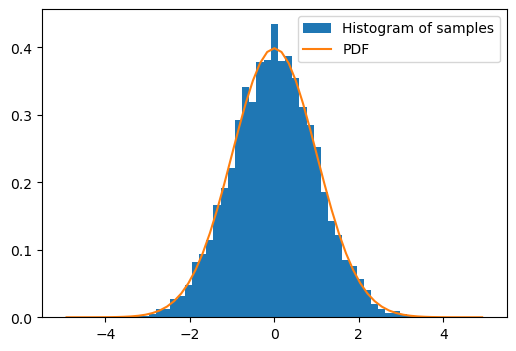

In [23]:
from scipy import stats

samples = npr.normal(size=10000)
bins = np.linspace(-5, 5, 60)
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(bin_centers)

plt.figure(figsize=(6, 4))
_,_,_ = plt.hist(samples, bins, label="Histogram of samples", density=True)  # with density true it nrommalize the bins to total area 1
plt.plot(bin_centers, pdf, label="PDF")
plt.legend()

mean, std = stats.norm.fit(samples)
print ("Mean:", mean, "    DevStd:", std)  

With scipy.stats we can also use `scipy.stats.linregress(x, y)`, funzione tilizzata per calcolare una regressione lineare semplice (tra due variabili) e ottenere statistiche utili, come il coefficiente angolare, l'intercetta e i coefficienti di correlazione.

Restituisce un oggetto della classe LinregressResult con i seguenti attributi:

    slope: Coefficiente angolare m.
    intercept: Intercetta q.
    rvalue: Coefficiente di correlazione r (da -1 a 1).
    pvalue: Valore p del test di ipotesi H0:slope=0.
    stderr: Errore standard della pendenza.
    intercept_stderr: Errore standard dell'intercetta.

### TESTS
With `scipy.stats` I can do many statistical tests:
* `ttest_ind(a, b)` Test t di Student per campioni indipendenti.
* `chisquare(f_obs, f_exp)` Test chi-quadro. Verifica se i dati osservati corrispondono a quelli attesi 
* `linregress(x, y)` Regressione lineare semplice. Restituisce pendenza, intercetta, coefficiente di correlazione e altro.

### INTEGRATION
The most generic integration routine is `scipy.integrate.quad()`, which integrate from a to b (possibly infinite interval), using the quadrature gaussian algorithm. The syntax is: 

`result, error = quad(f, a, b, args=())` with a and b being the inferior and superior limits, args being the optional parameters for the function f

In [25]:
from scipy.integrate import quad

res, err = quad(np.sin, 0, np.pi/2)

To integrate using discreet values we can usa `scipy.integrate.trapz(y, x=None, dx=1.0)`, that calculate the integral using hte trapezoid rule, where y are the data points (heights of trapezoids), x the optionale x axis values, dx the distances on the x axis between values.

In [4]:
from scipy.integrate import trapz

# Funzione y = x^2
x = np.linspace(0, 10, 100)  # 100 punti equidistanti tra 0 e 10
y = x**2

# Calcolo dell'integrale
result = trapz(y, x)
print("Integrale approssimato:", result)

Integrale approssimato: 333.35033840084344


/tmp/ipykernel_5756/4069561590.py:8: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  result = trapz(y, x)


Per integrare su piu dimensioni (in piu variabili) si usa `scipy.integrate.nquad()`. The syntax is:

`result, error = nquad(f, [(a1,b1),(a2,b2),... ],  args=())` with with the inferior and superior limits of each variable, and args being the optional parameters for the function f

We have to import:
```python
from scipy.integrate import nquad
```

### SOLVING ODE

For integrating ODE (ordinary differential equations) like $\frac{dy}{dt} = f(y,t)$ we use `scipy.integrate.odeint()`. The syntax is:

`sol = odeint( f, y0, t, args=(), tfirst=False, mxstep=500)` where y0 isinitial condition vector, t un array di valori di tempo sui quali calcolare la soluzione, args argomenti da passare a f, mxstep il numero massimo di step; 'sol' contains an array of the values of the solution for each value of time t

Example: let us solve the ODE $\frac{dy}{dt} = -2 y$ between $t = 0 \dots 4$, with the initial condition $y(t=0) = 1$:

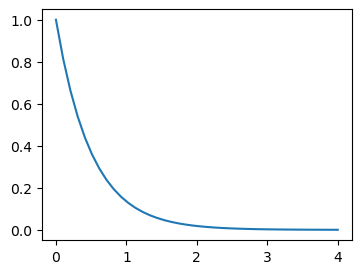

In [37]:
from scipy.integrate import odeint

def calc_derivative(ypos, time):
    return -2 * ypos
time_tic = np.linspace(0, 4, 40)
y = odeint(calc_derivative, y0=1, t=time_tic)

plt.figure(figsize=(4, 3))
plt.plot(time_vec, y)   # this way we plot the solution!

It is possible to solve systems of 1st order ODE, like:
$$
\left\{
\begin{aligned}
    \frac{dx}{dt} &= x + y \\
    \frac{dy}{dt} &= -x + y
\end{aligned}
\right.
$$

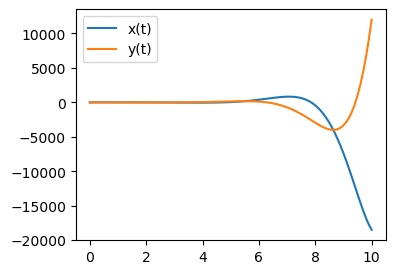

In [41]:
def system(variables, t):
    x, y = variables  # Unpack variables
    dxdt = x + y
    dydt = -x + y
    return [dxdt, dydt]

# Initial conditions
initial_conditions = [1, 0]  # x(0)=1, y(0)=0

# Time points
t = np.linspace(0, 10, 100)

# Solve the system
solution = odeint(system, initial_conditions, t)

# Plot results
plt.figure(figsize=(4, 3))
plt.plot(t, solution[:, 0], label='x(t)')
plt.plot(t, solution[:, 1], label='y(t)')
plt.legend()

### SYMBOLIC CALCULATIONS
There is also the possibility of performing symbolic calculations (a la Mathematica). `Sympy` is among the most convinent options.

In [43]:
from sympy import symbols, Function, Eq, dsolve

# Define the symbols
t = symbols('t')  # Time variable
gamma, omega_0 = symbols('gamma omega_0', positive=True, real=True)  # Parameters
x = Function('x')(t)  # Displacement as a function of time

# Define the damped harmonic oscillator equation
damped_eq = Eq(x.diff(t, t) + 2 * gamma * x.diff(t) + omega_0**2 * x, 0)

# Solve the differential equation
solution = dsolve(damped_eq, x)
print("General Solution:")  # this don t need initial conditions
print(solution)   # it prints in latex format!! very useful

General Solution:
Eq(x(t), C1*exp(t*(-gamma + sqrt(gamma - omega_0)*sqrt(gamma + omega_0))) + C2*exp(-t*(gamma + sqrt(gamma - omega_0)*sqrt(gamma + omega_0))))


In [44]:
# Define initial conditions: x(0) = 1, x'(0) = 0
ics = {x.subs(t, 0): 1, x.diff(t).subs(t, 0): 0}

# Solve with initial conditions
solution_with_ics = dsolve(damped_eq, x, ics=ics)
print("\nSolution with Initial Conditions:")
print(solution_with_ics)


Solution with Initial Conditions:
Eq(x(t), (-gamma/(2*sqrt(gamma - omega_0)*sqrt(gamma + omega_0)) + 1/2)*exp(-t*(gamma + sqrt(gamma - omega_0)*sqrt(gamma + omega_0))) + (gamma/(2*sqrt(gamma - omega_0)*sqrt(gamma + omega_0)) + 1/2)*exp(t*(-gamma + sqrt(gamma - omega_0)*sqrt(gamma + omega_0))))


### FAST FOURIER TRANSFORM
Le trasformate di Fourier vengono utilizzate per analizzare frequenze in un segnale temporale,in particolare trasformano un segnale dal dominio del tempo al dominio delle frequenze.
The `scipy.fftpack` module computes fast Fourier transforms ([FFT](https://en.wikipedia.org/wiki/Fast_Fourier_transform)) and offers utilities to handle them. The main functions are:
* `scipy.fftpack.fft()` to compute the FFT
* `scipy.fftpack.fftfreq()` to generate the sampling frequencies
* `scipy.fftpack.ifft()` computes the inverse FFT, from frequency space to signal space

We have to import:
```python
from scipy import fftpack
```

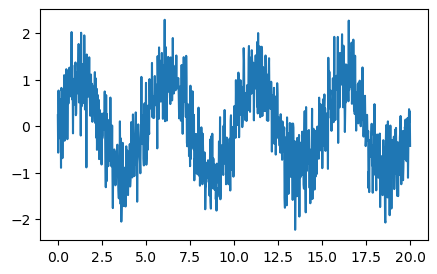

In [49]:
from scipy import fftpack

time_step = 0.02
period = 5.

npr.seed(1234)
time_vec = np.arange(0, 20, time_step)
# let's generate noisy signal:
sig = (np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(5, 3))
plt.plot(time_vec, sig, label='Original signal')

Is it close to the generated main frequency? True


[]

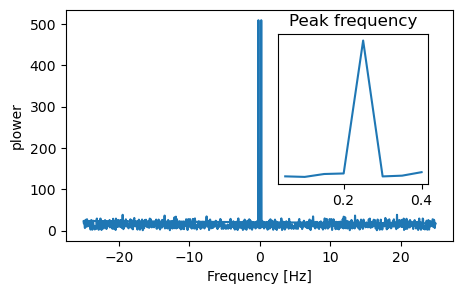

In [52]:
# The FFT of the signal is:
sig_fft = fftpack.fft(sig)   # this could give us something complex!!

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(5, 3))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
print ("Is it close to the generated main frequency?", np.allclose(peak_freq, 1./period))

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

scipy.signal.find_peaks_cwt can also be used for more advanced peak detection

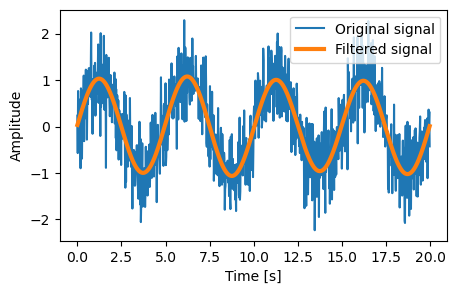

In [55]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(5, 3))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()